<a href="https://colab.research.google.com/github/highinaa/Sistem-Prediksi-Harga-Bahan-Pokok-/blob/main/Sistem_Prediksi_Harga_Bahan_Pokok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Data**

Import data adalah proses memuat dan membaca data ke notebook. Hal yang harus diperhatikan dalam import data adalah format data dan lokasi penyimpanan file dataset. Format data yang dapat di-import ke notebook bervariasi seperti .csv, .xlsx, .json, dan sebagainya.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import datetime as dt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

**Import Dataset**

import dataset yang digunakan yaitu library pandas karena dapat mengolah data dalam jumlah banyak dan data dapat disesuaikan


In [8]:
#Data Harian
data = pd.read_excel("/content/Harga Bahan Pokok Komoditas Pangan 2020 - 2022.xlsx",sheet_name='HARIAN')

**Cek tipe data, bentuk data**

Untuk melihat informasi lainnya yang juga dapat membantu memberikan gambaran mengenai dataset adalah dengan method info().

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Tanggal              1093 non-null   object
 1    Beras (Kg)          1093 non-null   object
 2    Gula Pasir (Kg)     1093 non-null   object
 3    Minyak Goreng (Lt)  1093 non-null   object
 4    Tepung Terigu (Kg)  1093 non-null   object
 5    Daging Sapi (Kg)    1093 non-null   object
 6    Daging Ayam (Kg)    1093 non-null   object
 7    Telur Ayam (Kg)     1093 non-null   object
 8    Cabe Merah  (Kg)    1093 non-null   object
 9    Bawang Merah (Kg)   1093 non-null   object
 10   Bawang Putih (Kg)   1093 non-null   object
dtypes: object(11)
memory usage: 94.1+ KB


**Cek Missing Value**

Untuk melihat apakah ada data yang sesuai atau tidak dalam data yang digunakan

In [10]:
data.isnull().sum()

Tanggal               0
Beras (Kg)            0
Gula Pasir (Kg)       0
Minyak Goreng (Lt)    0
Tepung Terigu (Kg)    0
Daging Sapi (Kg)      0
Daging Ayam (Kg)      0
Telur Ayam (Kg)       0
Cabe Merah  (Kg)      0
Bawang Merah (Kg)     0
Bawang Putih (Kg)     0
dtype: int64

*Note : Ternyata Tidak terdapat missing value data*

**EDA**

**Exploratory Data Analysis**

suatu porses dalam melakukan inspeksi/investigasi awal pada data untuk menemukan pola dan anomali, serta untuk menguji hipotesis dan untuk memeriksa asumsi dengan bantuan ringkasan statistik dan representasi visualisasi grafis.

In [11]:
#Pengelompokan Jenis
Beras = ['Beras (Kg)']
Gula = ['Gula Pasir (Kg)']
Minyak = ['Minyak Goreng (Lt)']
Tepung = ['Tepung Terigu (Kg)']
Daging = ['Daging Sapi (Kg)', 'Telur Ayam (Kg)']
Cabe = ['Cabe Merah (Kg)']
Bawang = ['Bawang Merah (Kg)', 'Bawang Putih (Kg)']

In [13]:
df = data.copy()
df.index = pd.to_datetime(df['Tanggal'])
df.drop('Tanggal',axis=1,inplace = True)

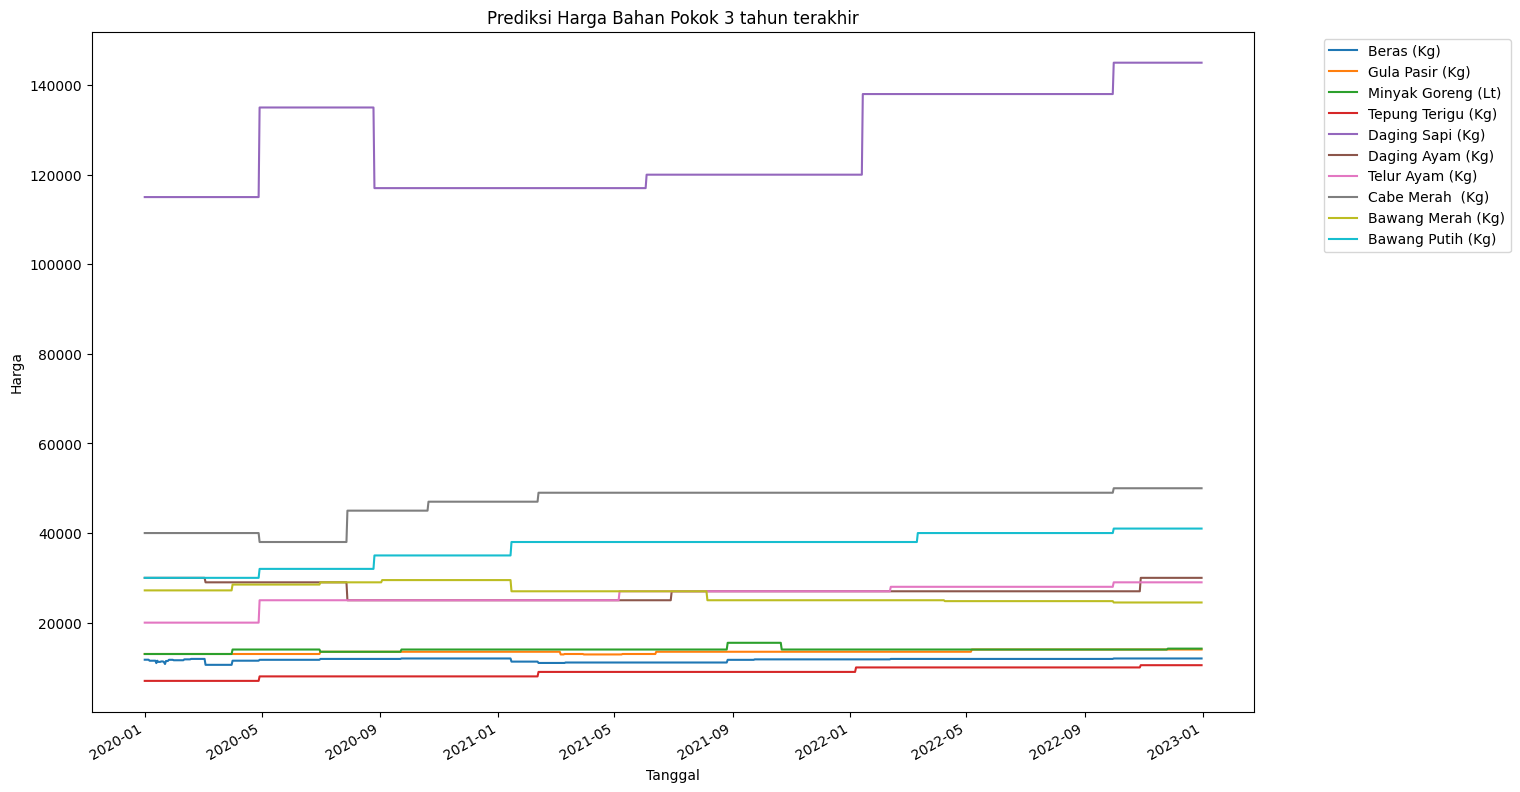

In [14]:
df.plot(kind='line', figsize=(15, 10))
plt.legend(loc='upper center',bbox_to_anchor=(1.14, 1))
plt.title('Prediksi Harga Bahan Pokok 3 tahun terakhir')
plt.ylabel('Harga')
plt.xlabel('Tanggal')
plt.show()

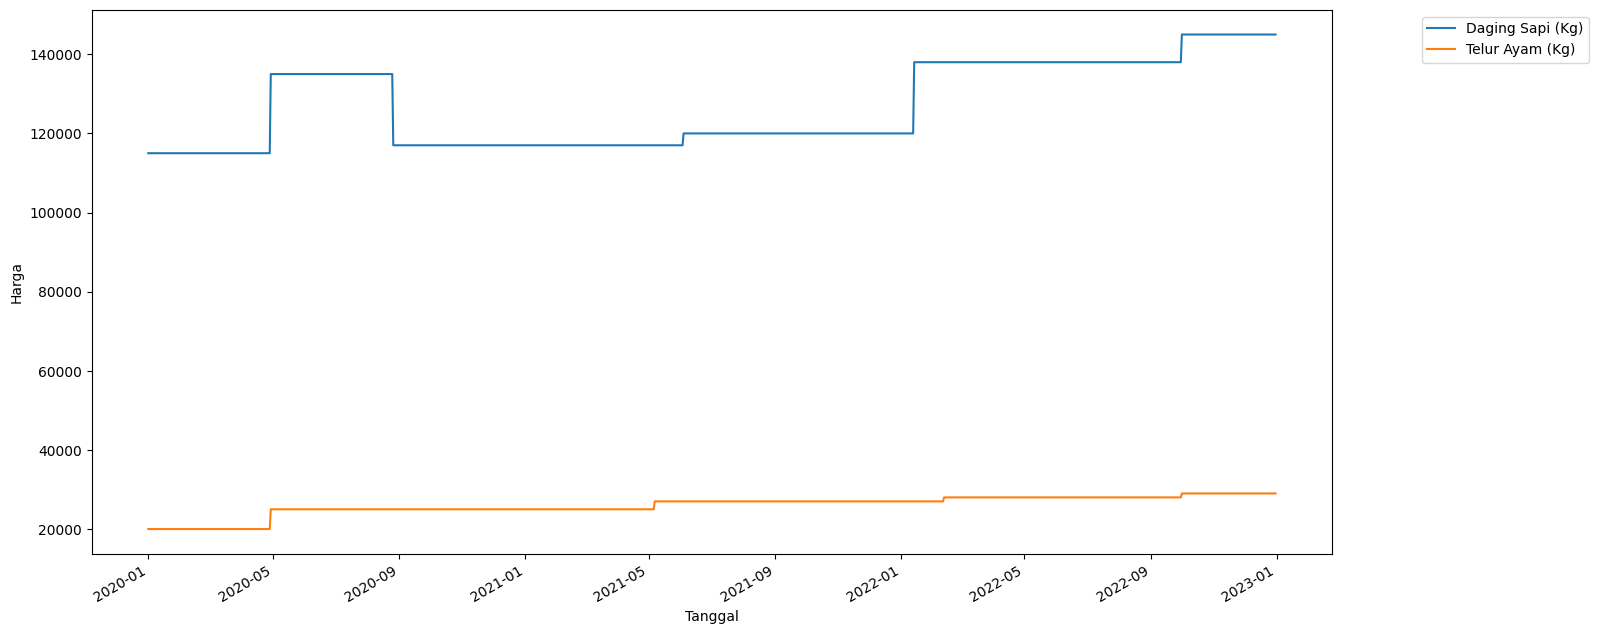

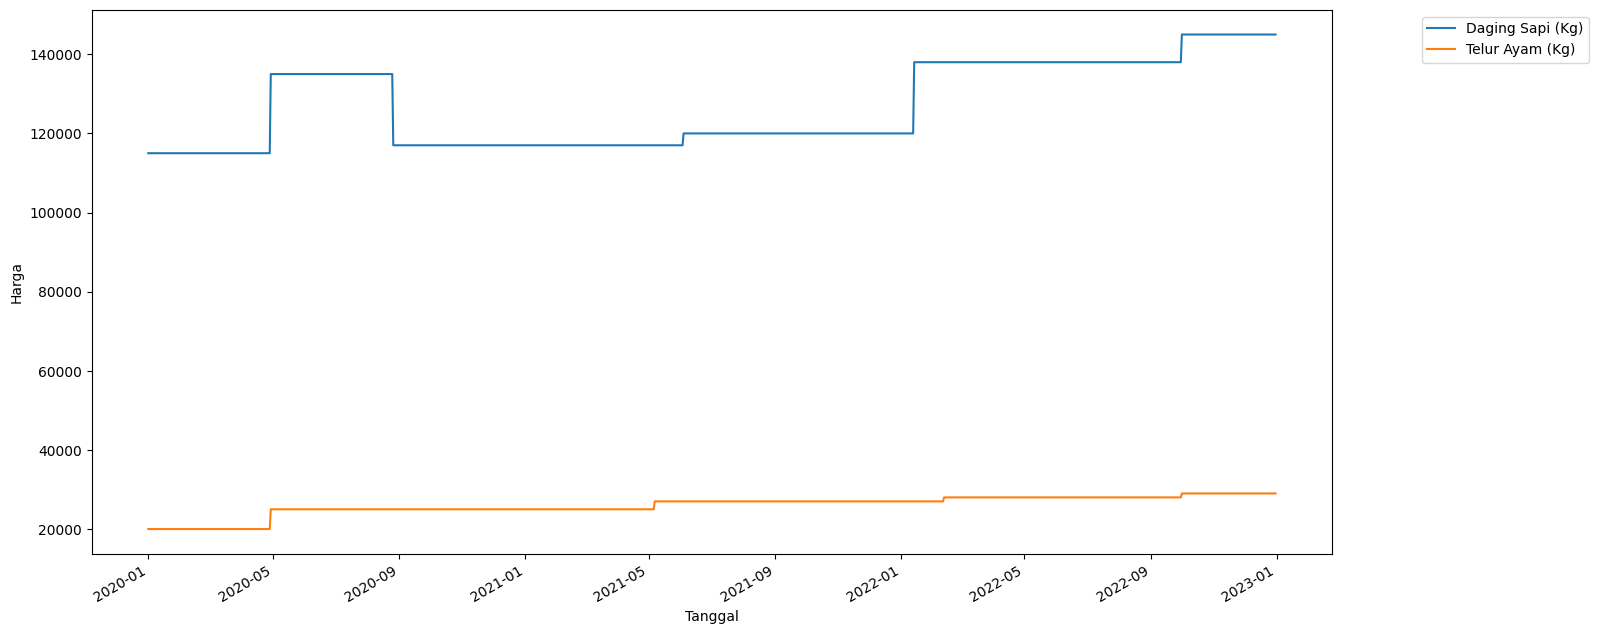

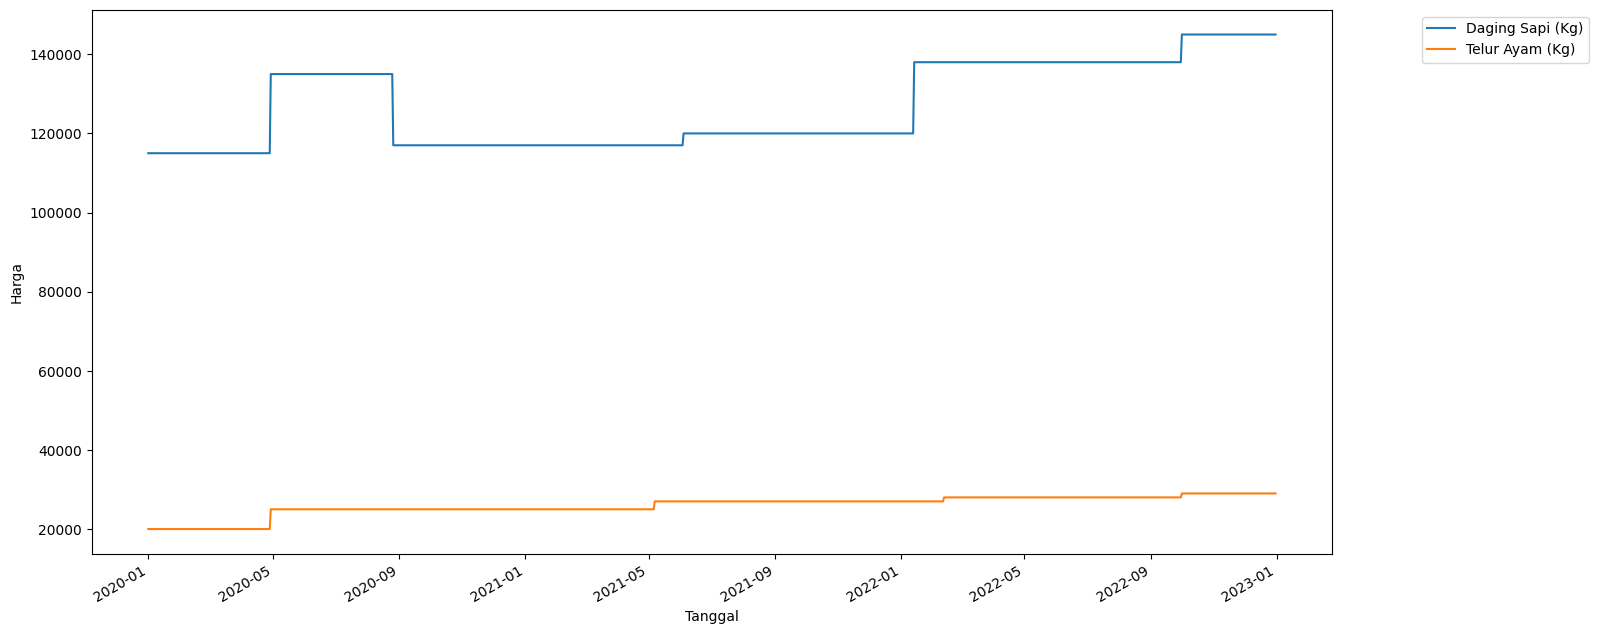

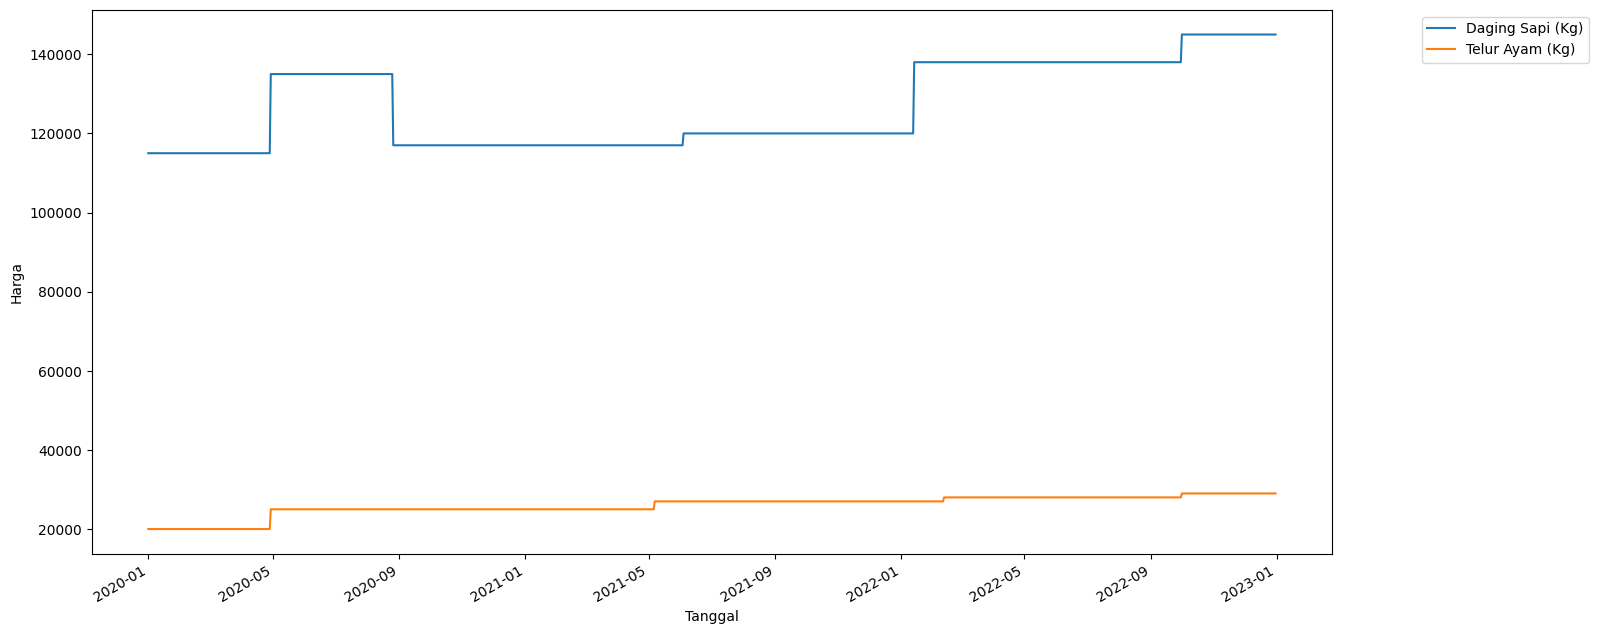

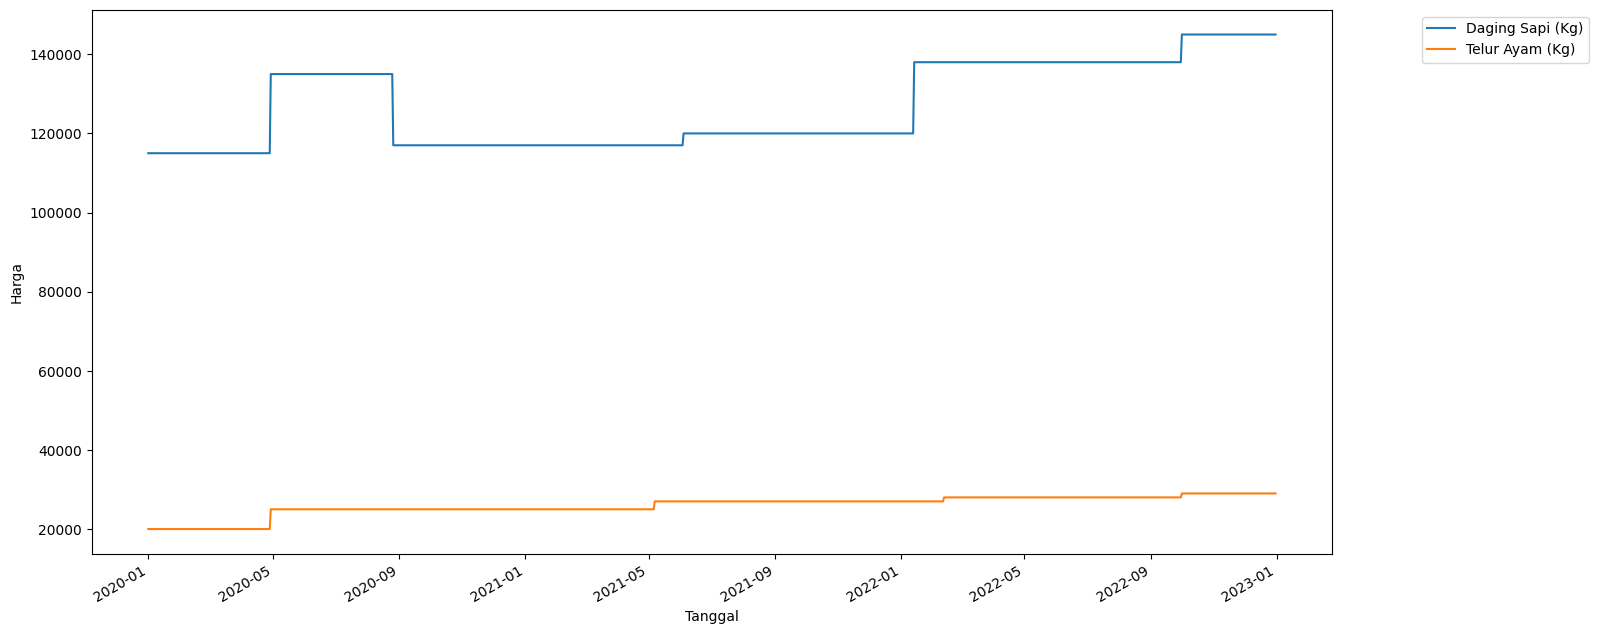

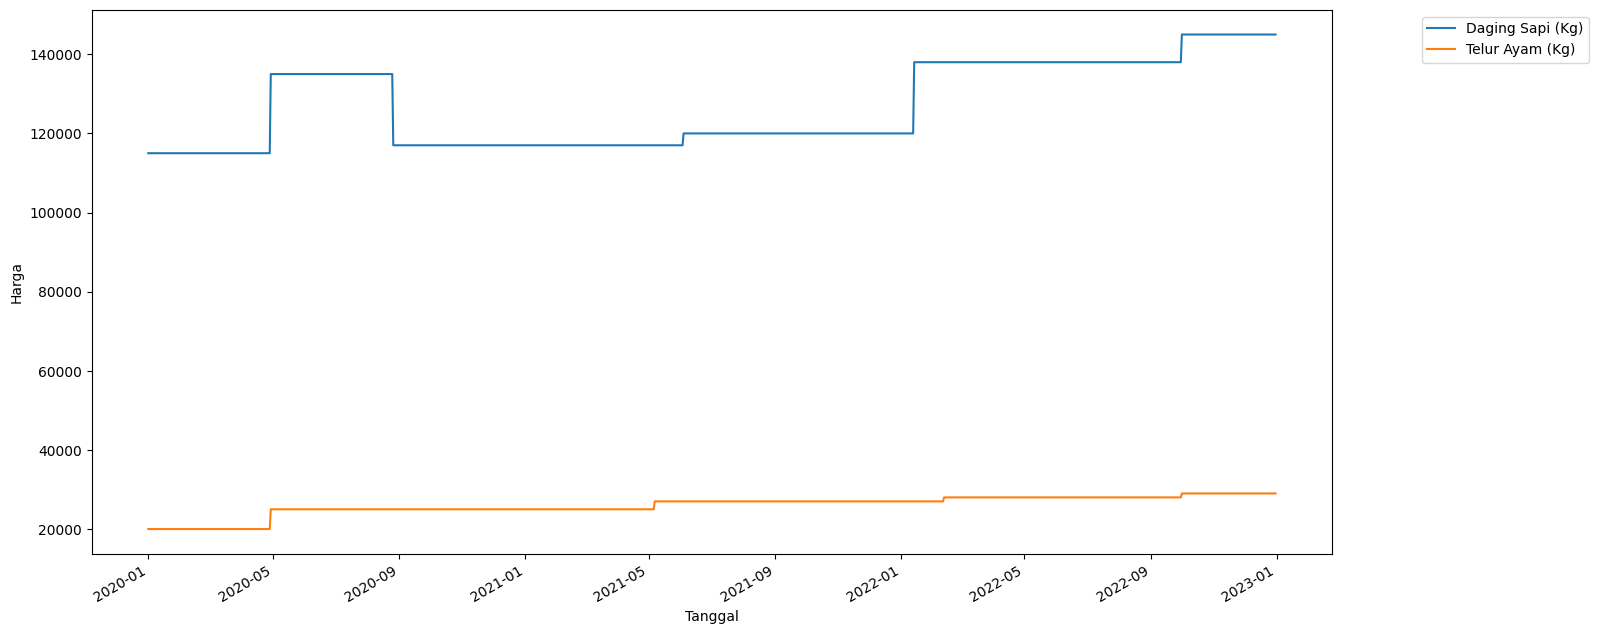

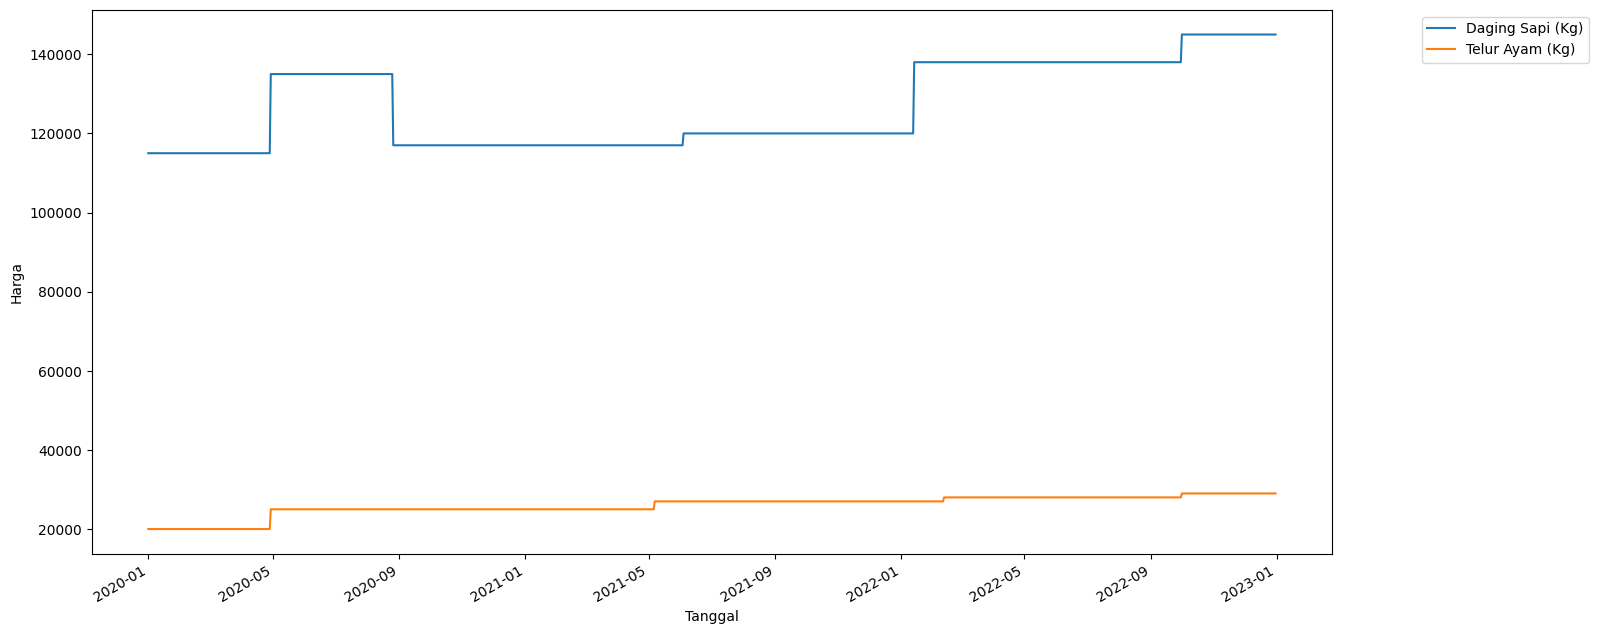

In [16]:
for i in Kategori:
  dataset.plot(kind='line', figsize=(16, 8))
  plt.legend(loc='upper center',bbox_to_anchor=(1.14, 1))
  plt.ylabel('Harga')
  plt.xlabel('Tanggal')
  plt.show()

***Selisih Kenaikan Harga bahan Pokok dari 01-01-2020 sampai 31-12-2022***

In [18]:
desc = df.describe().loc[['mean','min','max']].T.reset_index()
tgl = df.loc[['20200101','20221231'],:].T.reset_index()
diff = df.loc[['20200101','20221231'],:].diff().loc['20221231',:].reset_index(drop=True)
diff = pd.DataFrame(list(zip(diff.values.tolist())),columns =['Selisih'])

#gabungkan data statistik deskriptif
stat_deskriptif = pd.concat([desc,tgl,diff],axis=1)
stat_deskriptif = stat_deskriptif.T.drop_duplicates().T

#ubah nama variabel
old_var = stat_deskriptif.columns
new_var = ['Bahan Pokok', 'mean', 'min', 'max', '2020/01/01', '2022/12/31', 'Selisih']
stat_deskriptif.rename(columns=dict(zip(old_var, new_var)), inplace=True)

#tambahkan persentase selisih
stat_deskriptif['Persentase Selisih (%)'] = stat_deskriptif['Selisih']/stat_deskriptif['2020/01/01']*100
stat_deskriptif

,Bahan Pokok,mean,min,max,2020/01/01,2022/12/31,Selisih,Persentase Selisih (%)
0,Beras (Kg),11668.968893,10580.0,12000.0,11725,12000,275.0,2.345416
1,Gula Pasir (Kg),13476.761208,12900.0,14000.0,13000,14000,1000.0,7.692308
2,Minyak Goreng (Lt),13961.756633,13000.0,15500.0,13000,14200,1200.0,9.230769
3,Tepung Terigu (Kg),8874.656908,7000.0,10500.0,7000,10500,3500.0,50.0
4,Daging Sapi (Kg),126684.354986,115000.0,145000.0,115000,145000,30000.0,26.086957
5,Daging Ayam (Kg),27002.744739,25000.0,30000.0,30000,30000,0.0,0.0
6,Telur Ayam (Kg),25934.126258,20000.0,29000.0,20000,29000,9000.0,45.0
7,Cabe Merah (Kg),46672.461116,38000.0,50000.0,40000,50000,10000.0,25.0
8,Bawang Merah (Kg),26558.005489,24500.0,29500.0,27200,24500,-2700.0,-9.926471
9,Bawang Putih (Kg),36708.142726,30000.0,41000.0,30000,41000,11000.0,36.666667


**Cek Autokorelasi **

 Uji autokorelasi bertujuan untuk menunjukkan korelasi anggota observasi yang diurutkan berdasarkan deret waktu (time series)

In [19]:
def autokorelasi(data):
  col = data.drop('Tanggal',axis=1).columns
  frame = []
  for i in col:
    nilai = data[i].autocorr()
    frame.append(nilai)
    print('variabel {} memiliki autokorelasi sebesar {}'.format(i,nilai))
    if nilai > 0:
      print('autokorelasi positif, mengikuti tren')
    else:
      None
    print('')
  print('')
  return pd.DataFrame(frame).plot(kind='line',title='Visualisasi Nilai Autokorelasi Data')

**Autokorelasi data harian**

variabel Beras (Kg) memiliki autokorelasi sebesar 0.9828845901818605
autokorelasi positif, mengikuti tren

variabel Gula Pasir (Kg) memiliki autokorelasi sebesar 0.9957496678166252
autokorelasi positif, mengikuti tren

variabel Minyak Goreng (Lt) memiliki autokorelasi sebesar 0.9872806125732271
autokorelasi positif, mengikuti tren

variabel Tepung Terigu (Kg) memiliki autokorelasi sebesar 0.9986308903536747
autokorelasi positif, mengikuti tren

variabel Daging Sapi (Kg) memiliki autokorelasi sebesar 0.9955665575681658
autokorelasi positif, mengikuti tren

variabel Daging Ayam (Kg) memiliki autokorelasi sebesar 0.9951076320939336
autokorelasi positif, mengikuti tren

variabel Telur Ayam (Kg) memiliki autokorelasi sebesar 0.9976790494217166
autokorelasi positif, mengikuti tren

variabel Cabe Merah  (Kg) memiliki autokorelasi sebesar 0.9981350005374241
autokorelasi positif, mengikuti tren

variabel Bawang Merah (Kg) memiliki autokorelasi sebesar 0.9981946587894724
autokorelasi positif, me

<Axes: title={'center': 'Visualisasi Nilai Autokorelasi Data'}>

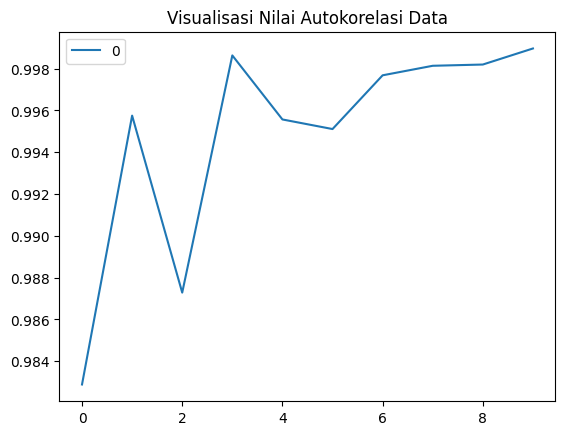

In [20]:
autokorelasi(data)

*Note : bahwa semua bahan pokok dalam data harian mengikuti tren*

**Cek Korelasi pada ARIMA,ARMA dan SARIMA**


<ipython-input-22-baaf0aeddf4f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)


<Axes: >

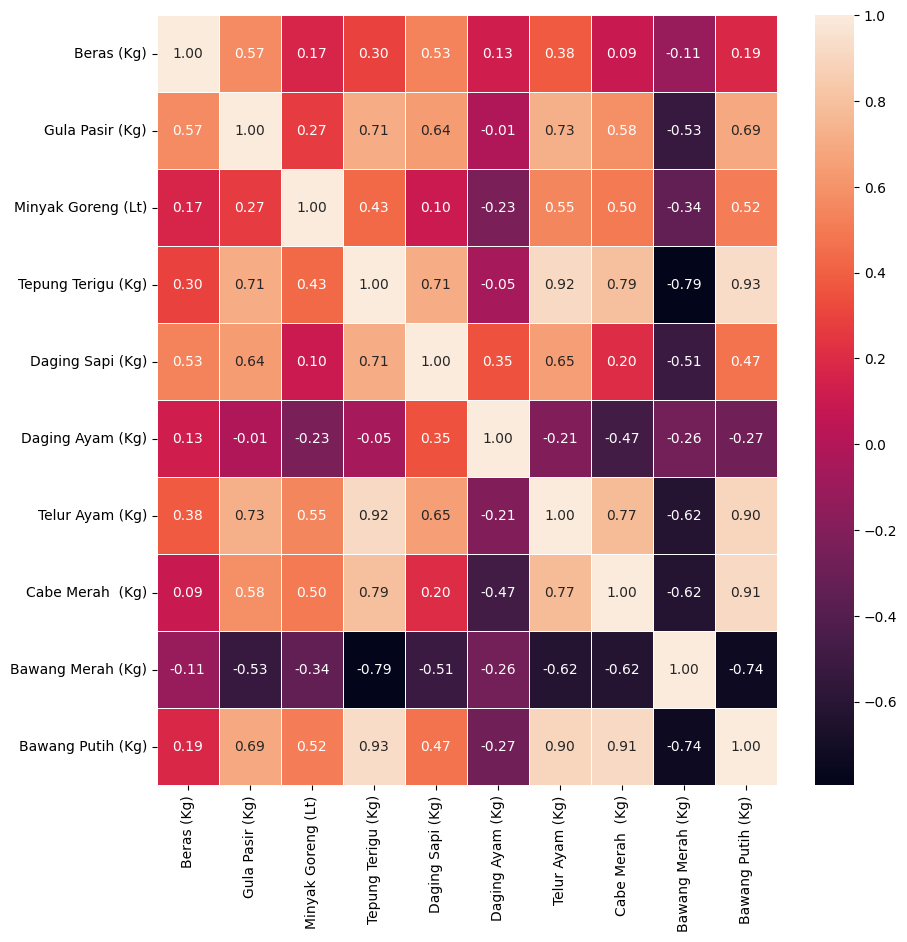

In [22]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)

*  Cek Stasioner*

In [21]:
def test_stasioner(timeseries):
  stasioner = []
  nonstasioner = []
  for i in timeseries.columns:
    print("Hasil dickey fuller variabel {}".format(i))
    adft = adfuller(timeseries[i],autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])

    for key,values in adft[4].items():
        output['Nilai Kritis (%s)'%key] =  values
    print(output)
    print('')

    if output['p-value'] < 0.05:
      stasioner.append(i)
    else:
      nonstasioner.append(i)
  print('Stasioner = ',stasioner)
  print('Tidak Stasioner = ',nonstasioner)

#apply fungsi test_stasioner
test_stasioner(df)

Hasil dickey fuller variabel Beras (Kg)
Test Statistics                  -3.003833
p-value                           0.034538
No. of lags used                  0.000000
Number of observations used    1092.000000
Nilai Kritis (1%)                -3.436353
Nilai Kritis (5%)                -2.864190
Nilai Kritis (10%)               -2.568181
dtype: float64

Hasil dickey fuller variabel Gula Pasir (Kg)
Test Statistics                  -1.461384
p-value                           0.552520
No. of lags used                  0.000000
Number of observations used    1092.000000
Nilai Kritis (1%)                -3.436353
Nilai Kritis (5%)                -2.864190
Nilai Kritis (10%)               -2.568181
dtype: float64

Hasil dickey fuller variabel Minyak Goreng (Lt)
Test Statistics                  -3.021794
p-value                           0.032909
No. of lags used                  0.000000
Number of observations used    1092.000000
Nilai Kritis (1%)                -3.436353
Nilai Kritis (5%) 

Note :  *terbukti lebih banyak variabel data memiliki tren / tidak stasioner*

`maka Model ARMA, ARIMA, SARIMA tidak direkomendasikan`

**Maka akan dilihat pola trend, musiman per 3 bulan dari data bahan pokok **

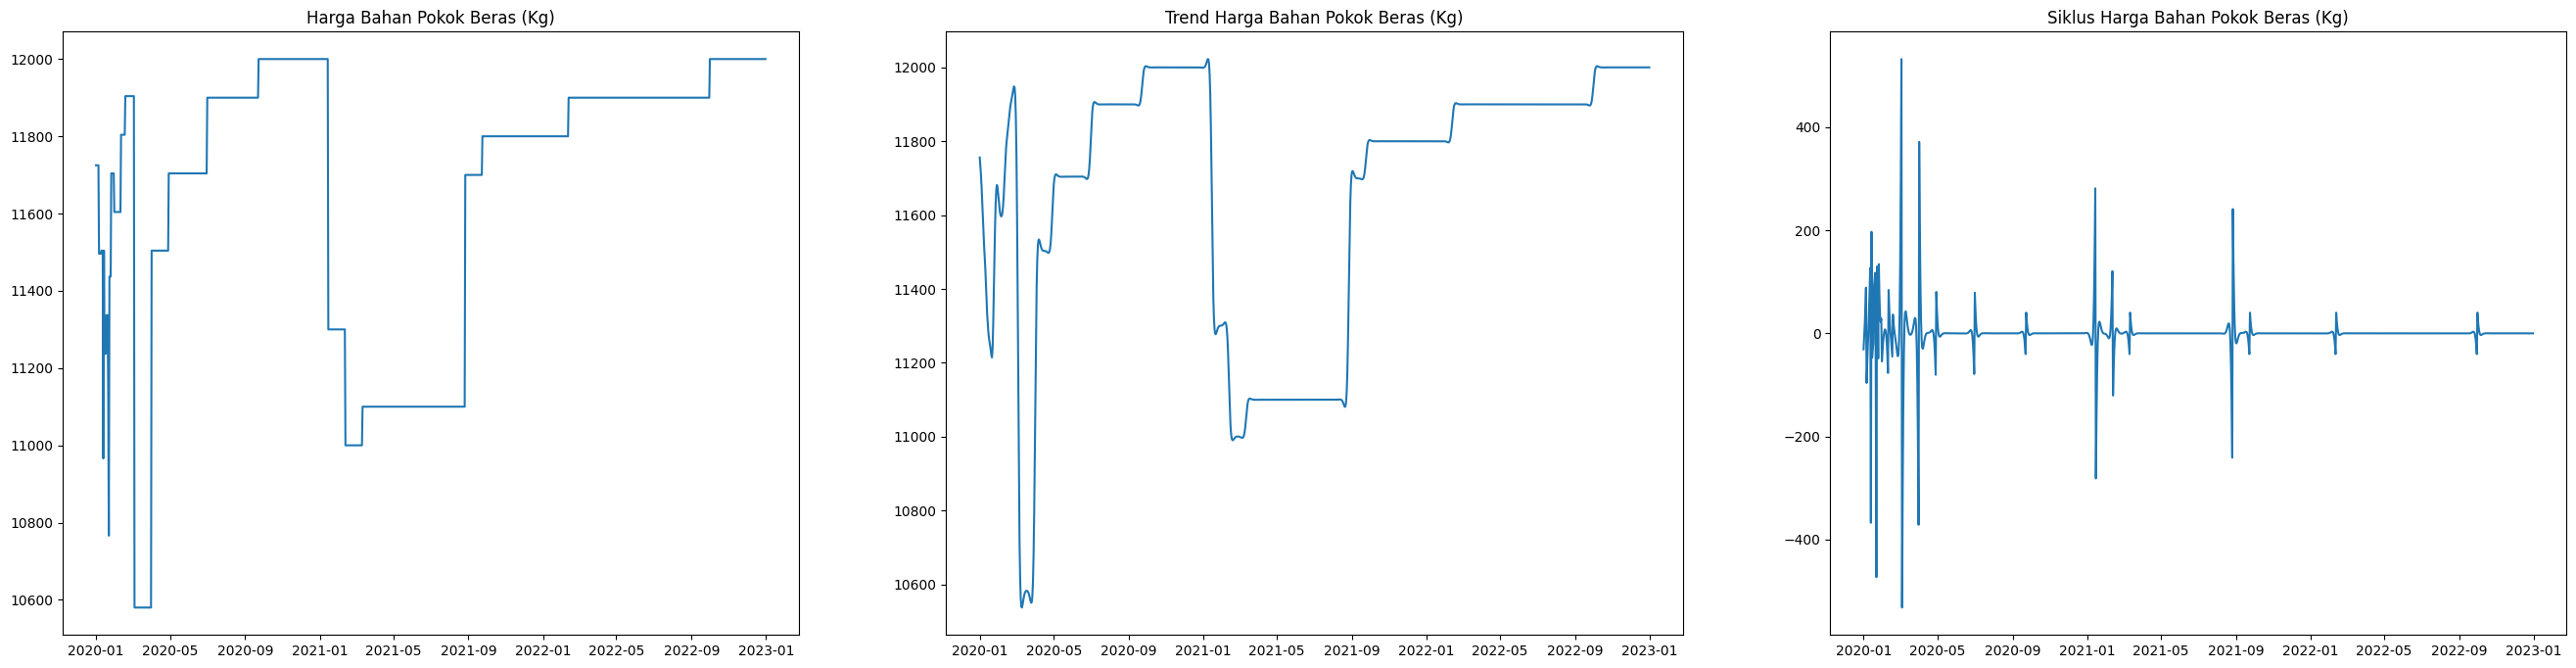

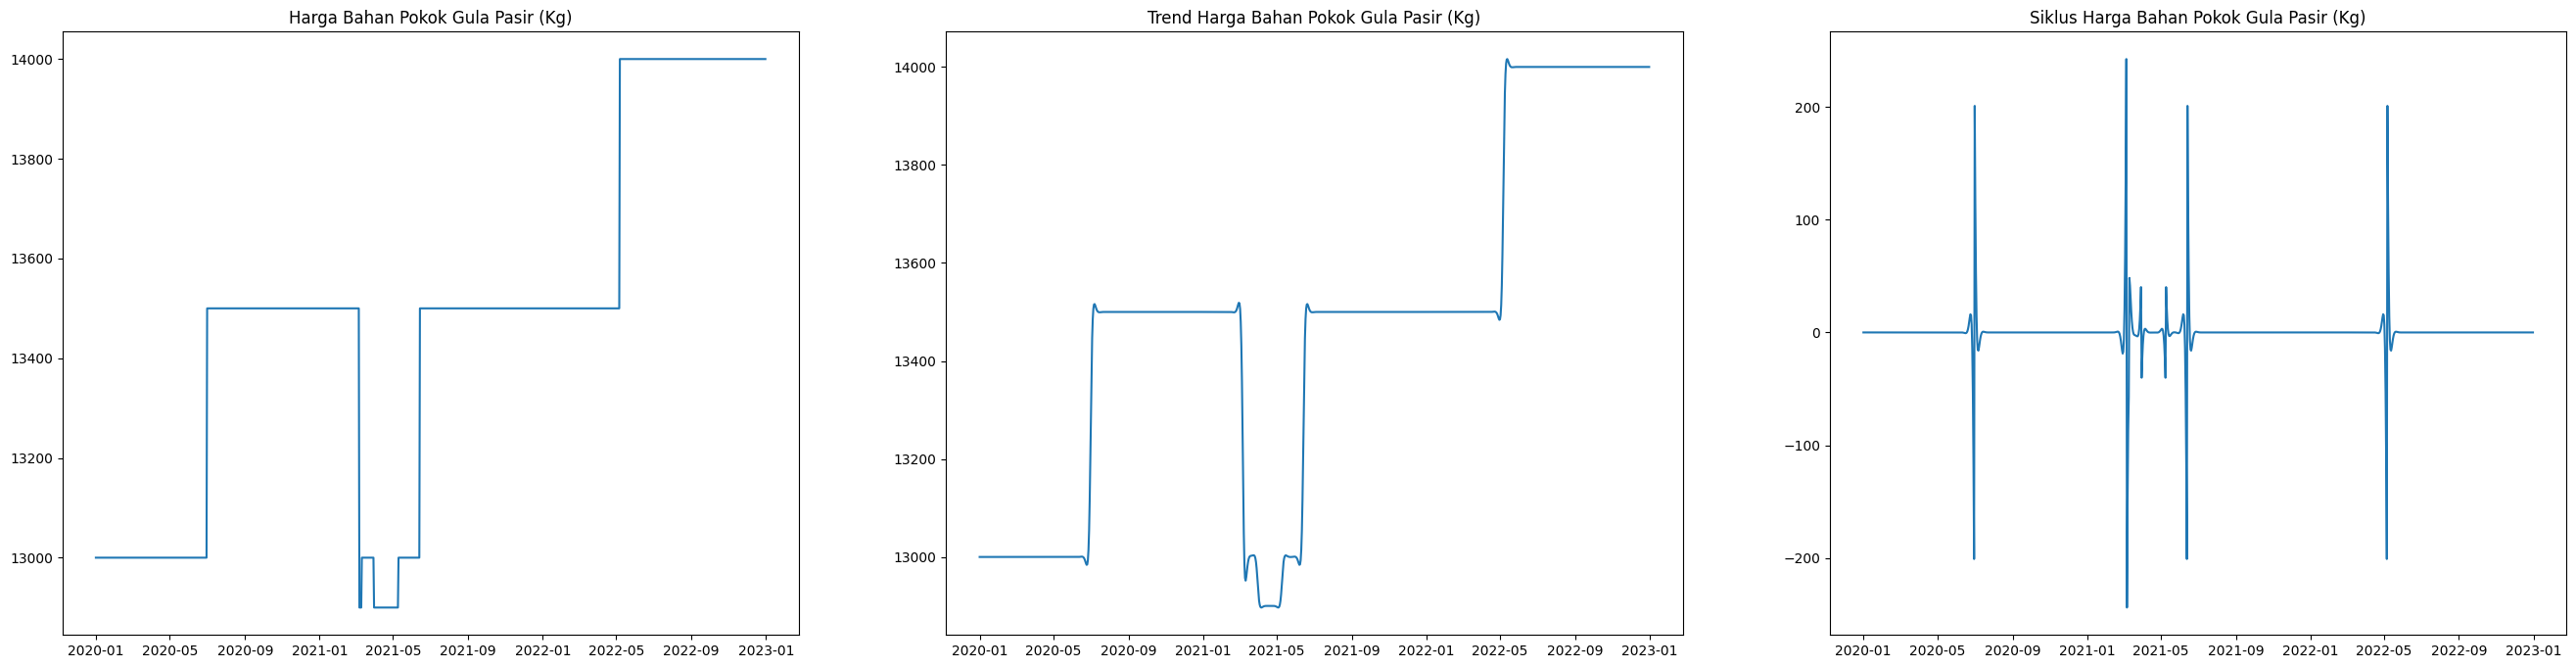

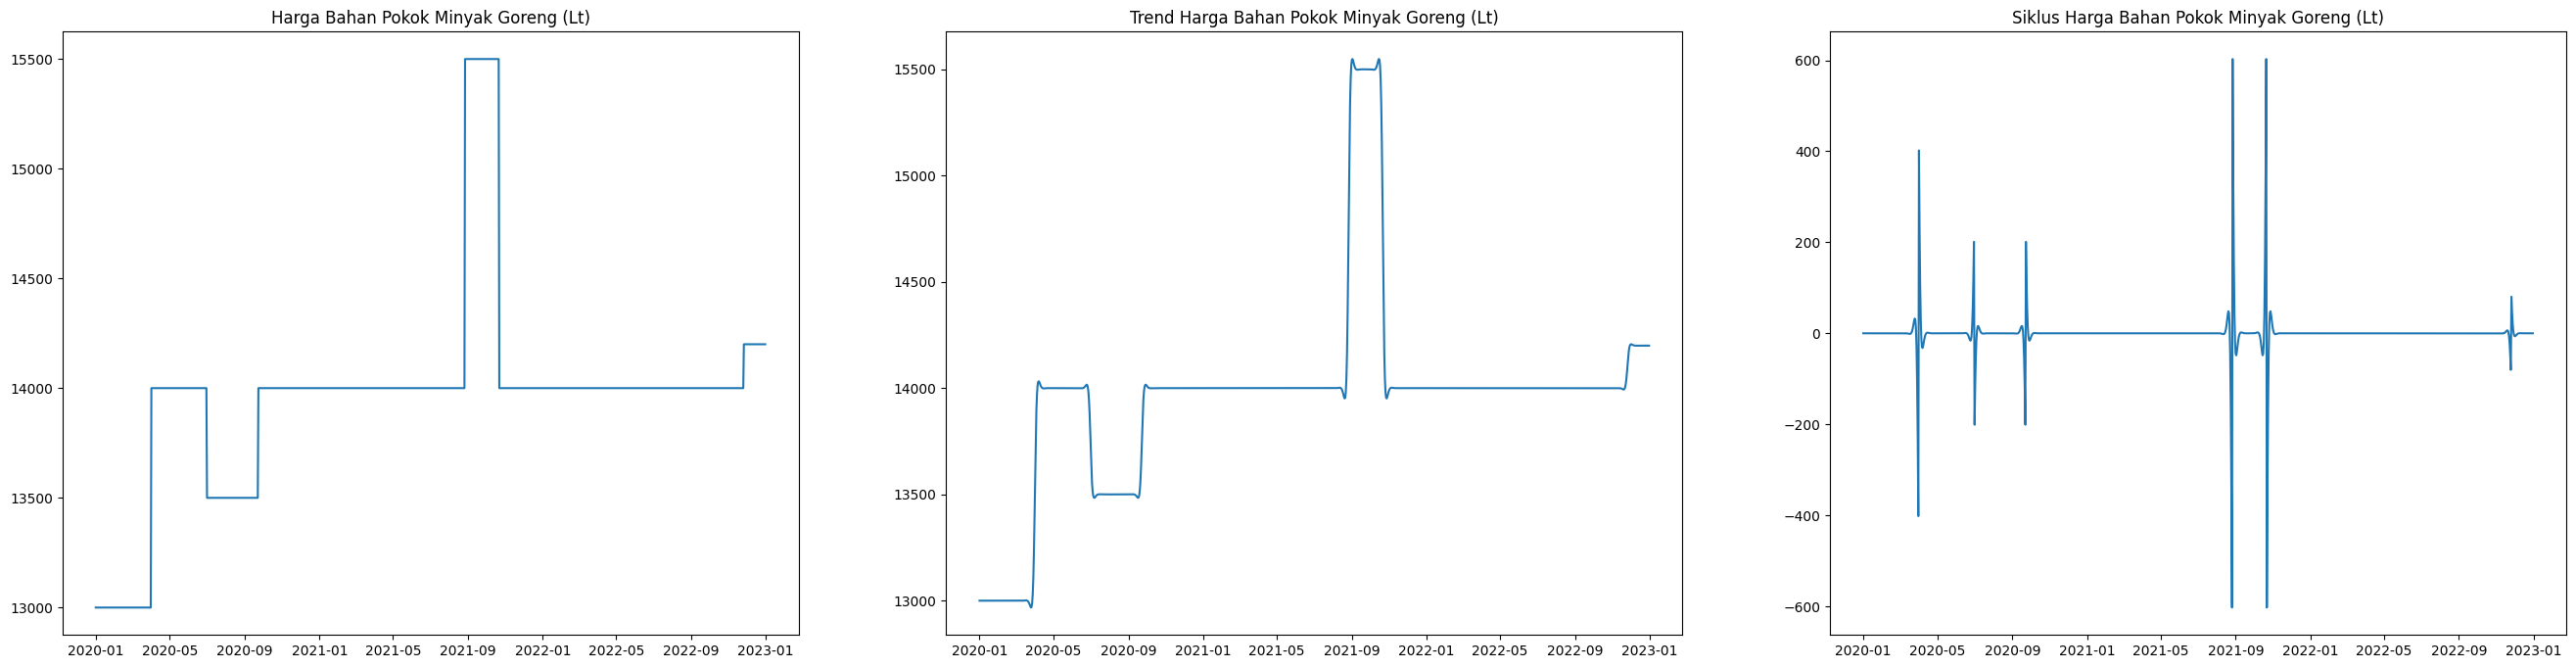

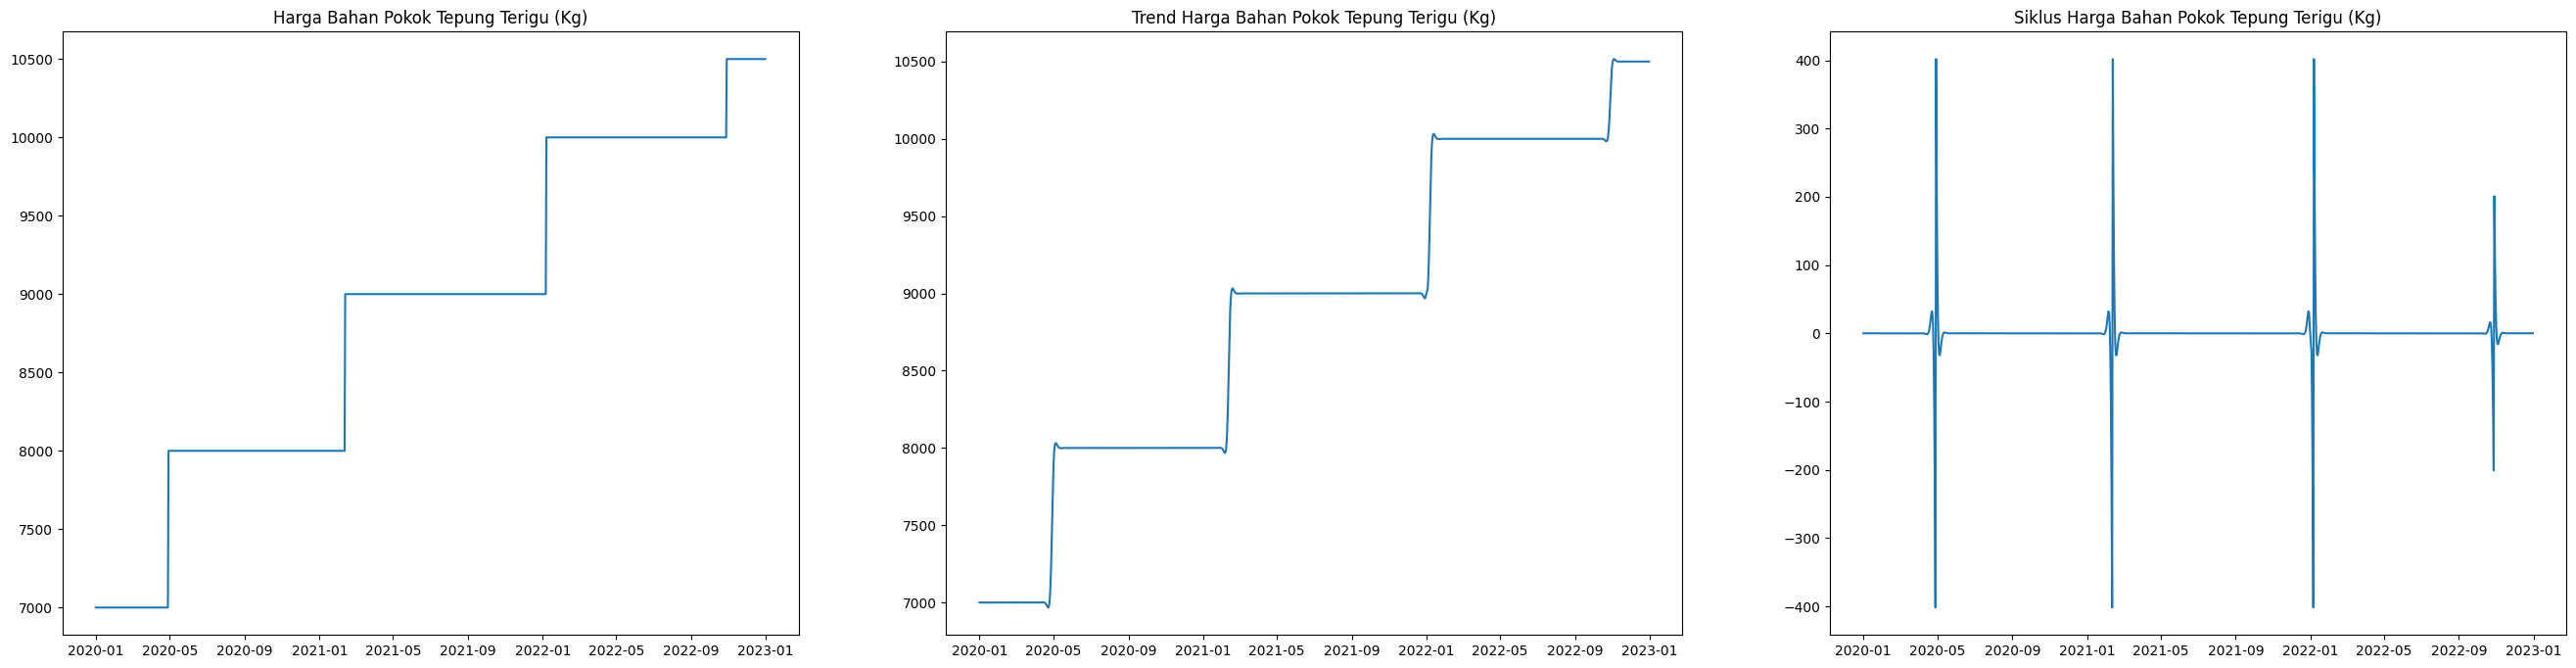

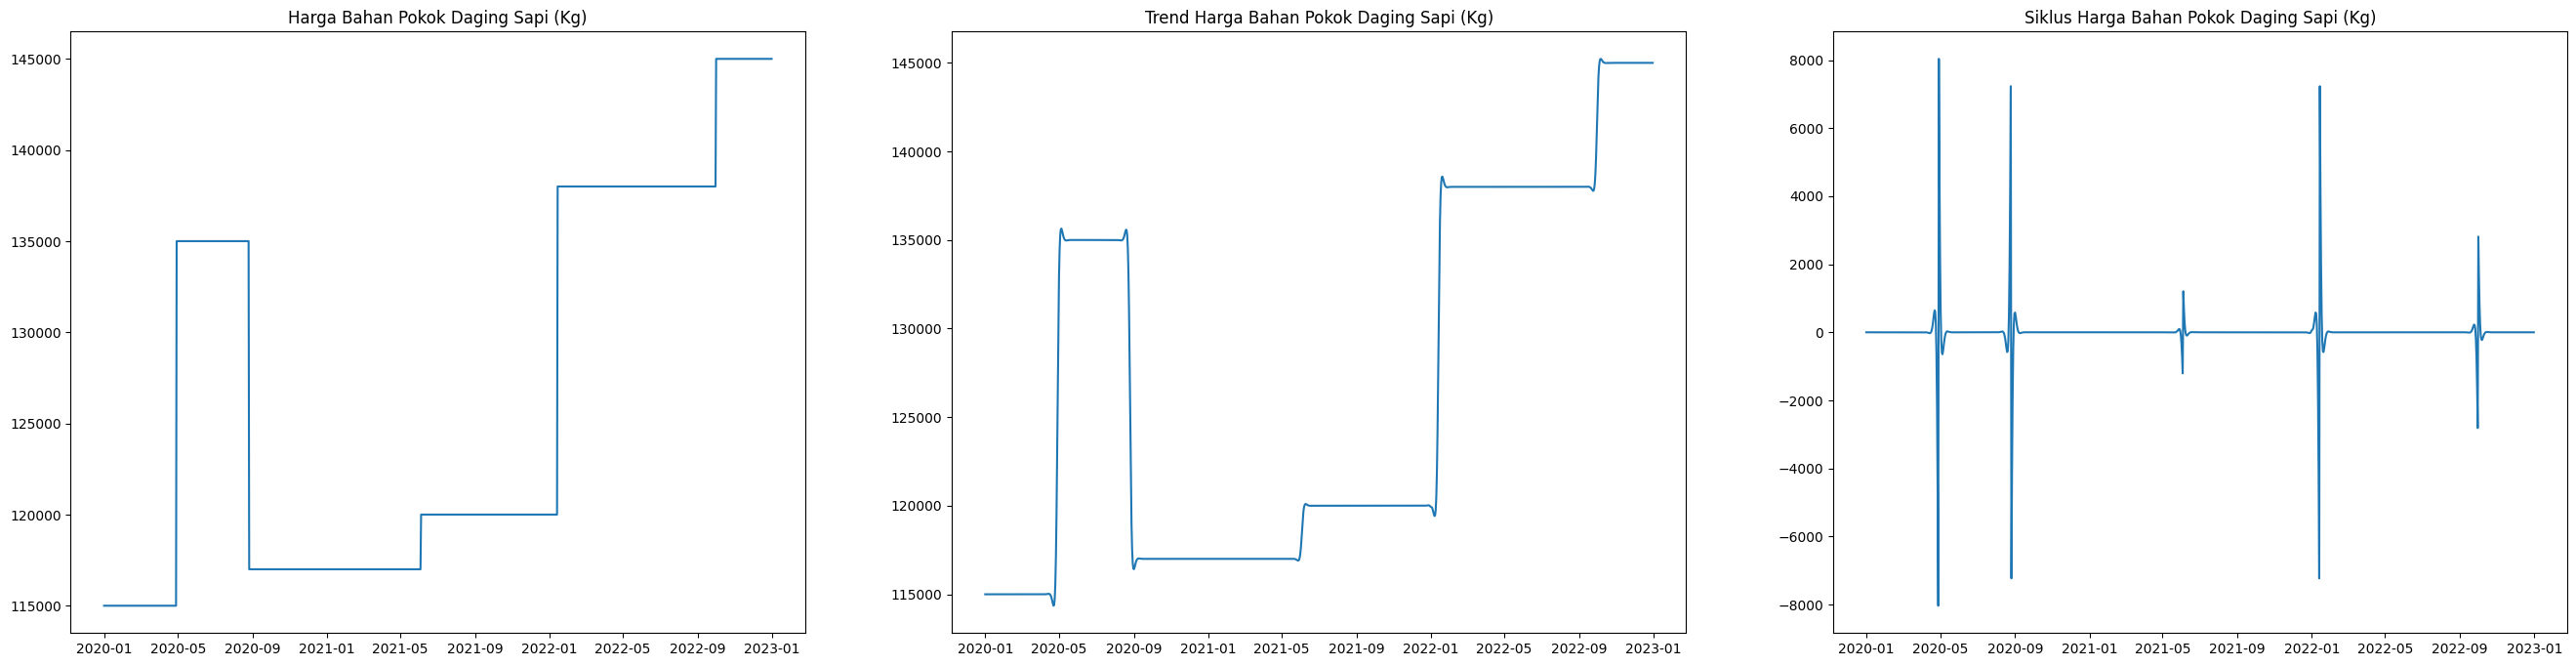

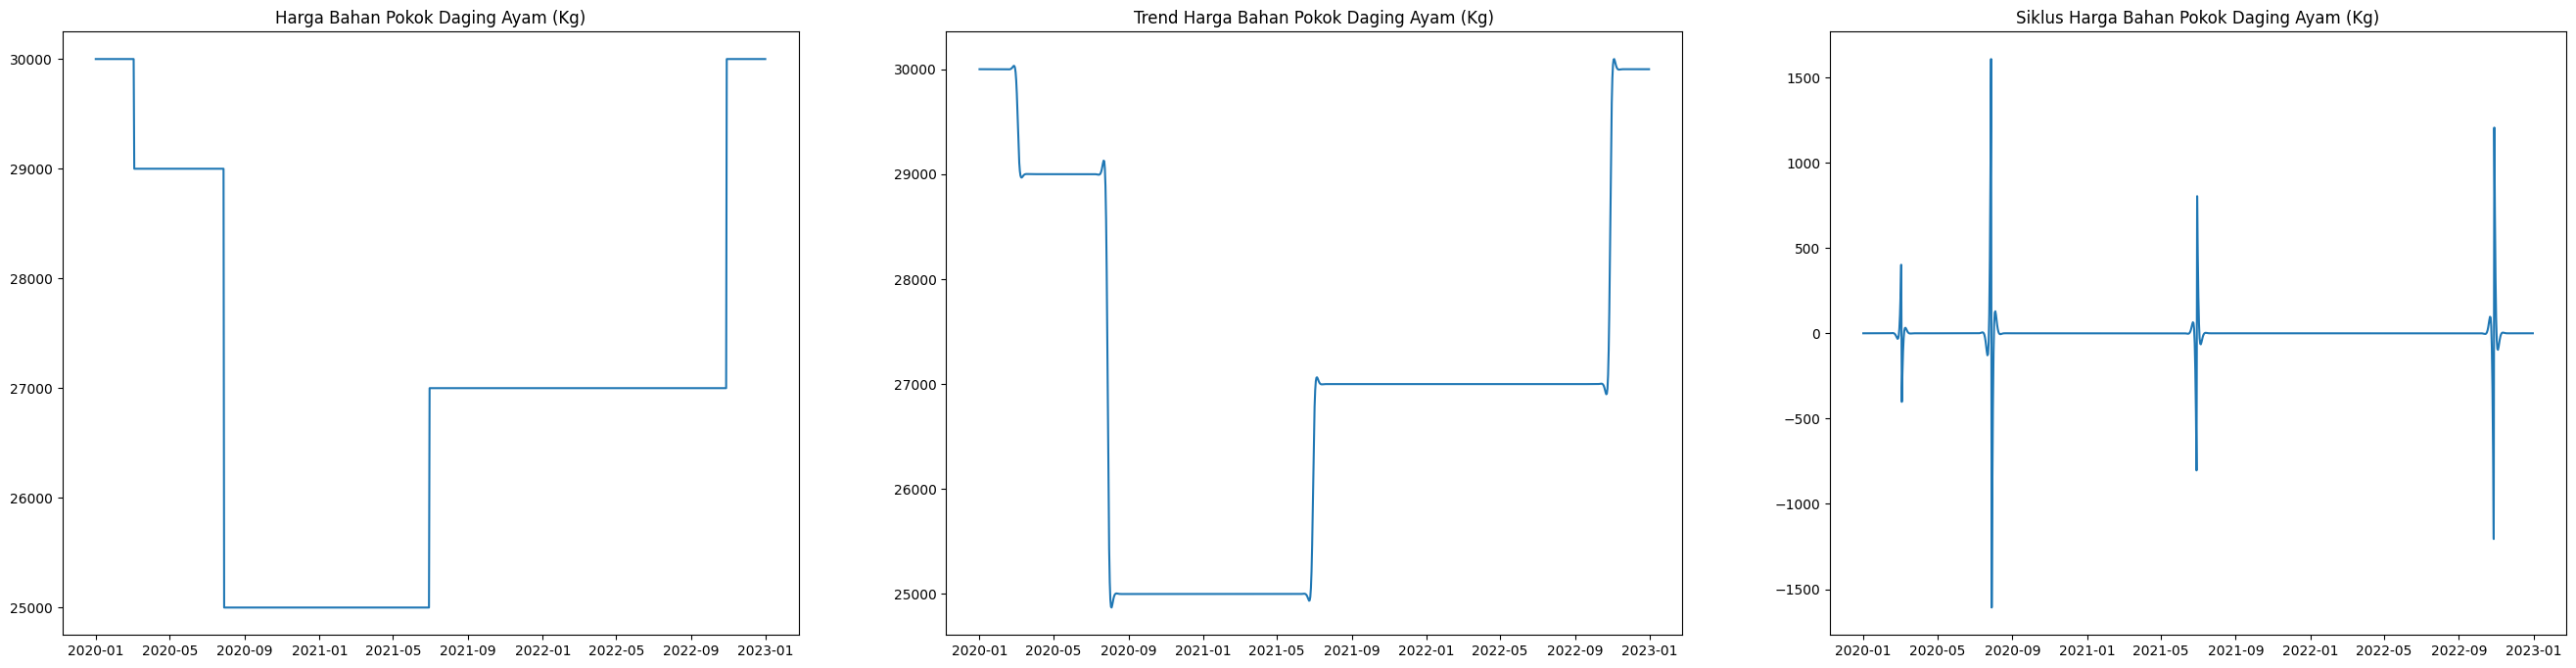

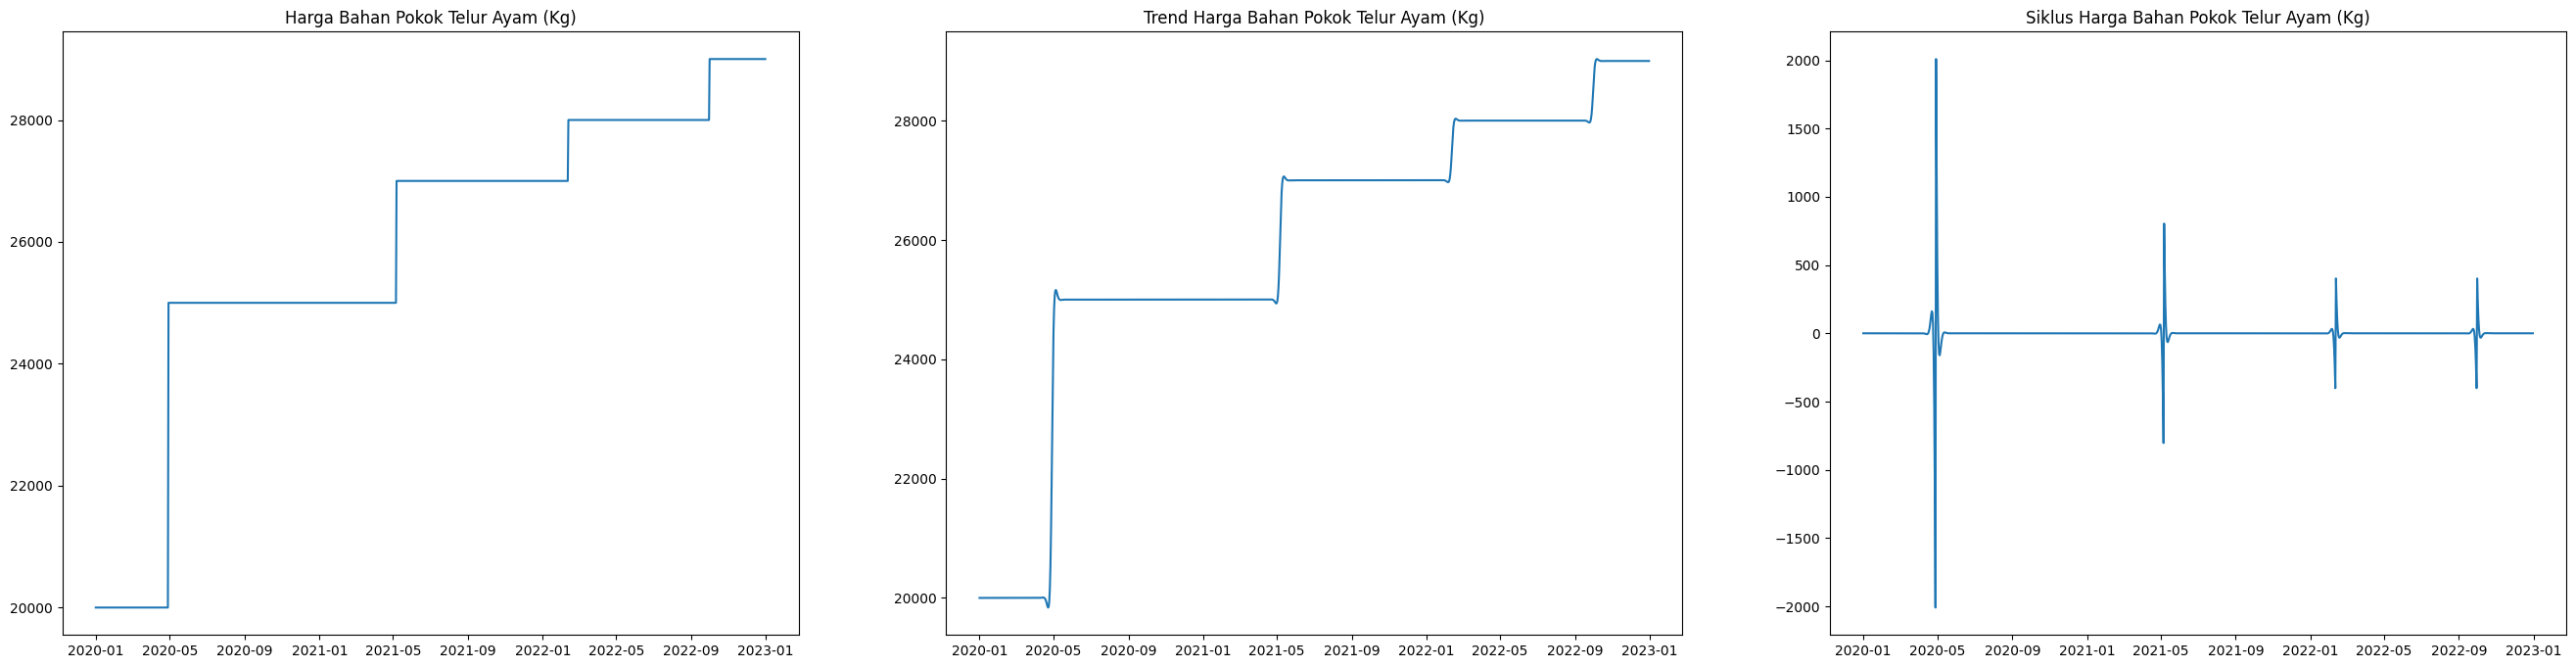

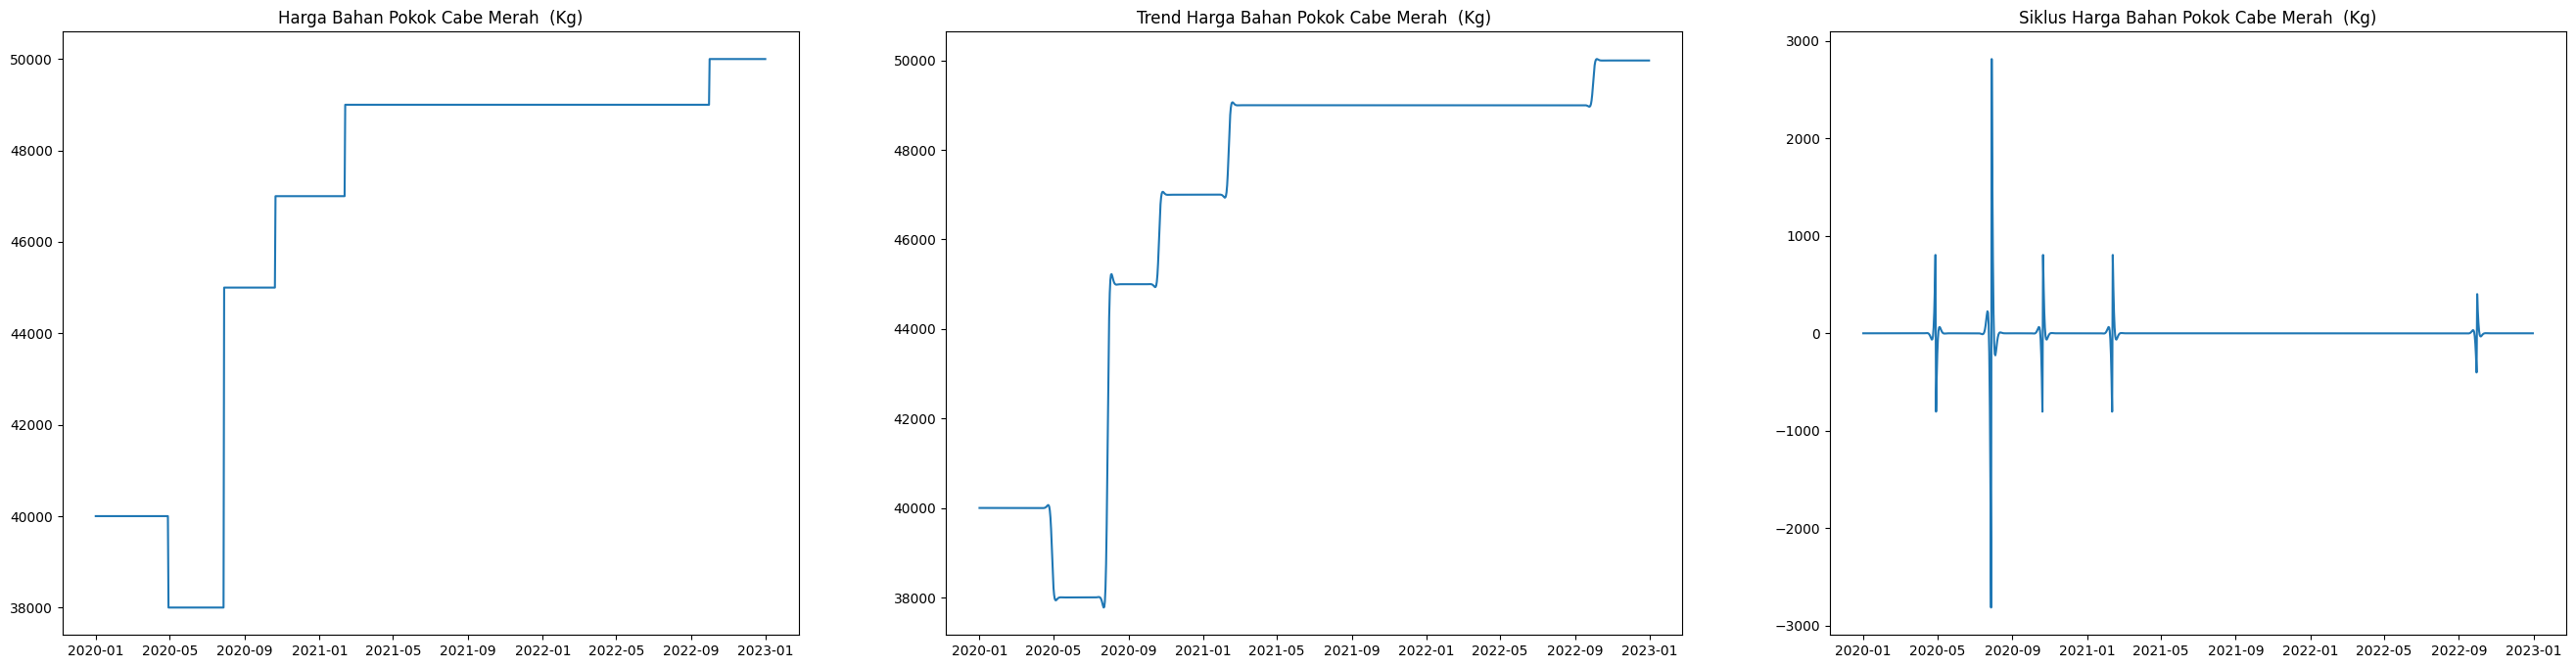

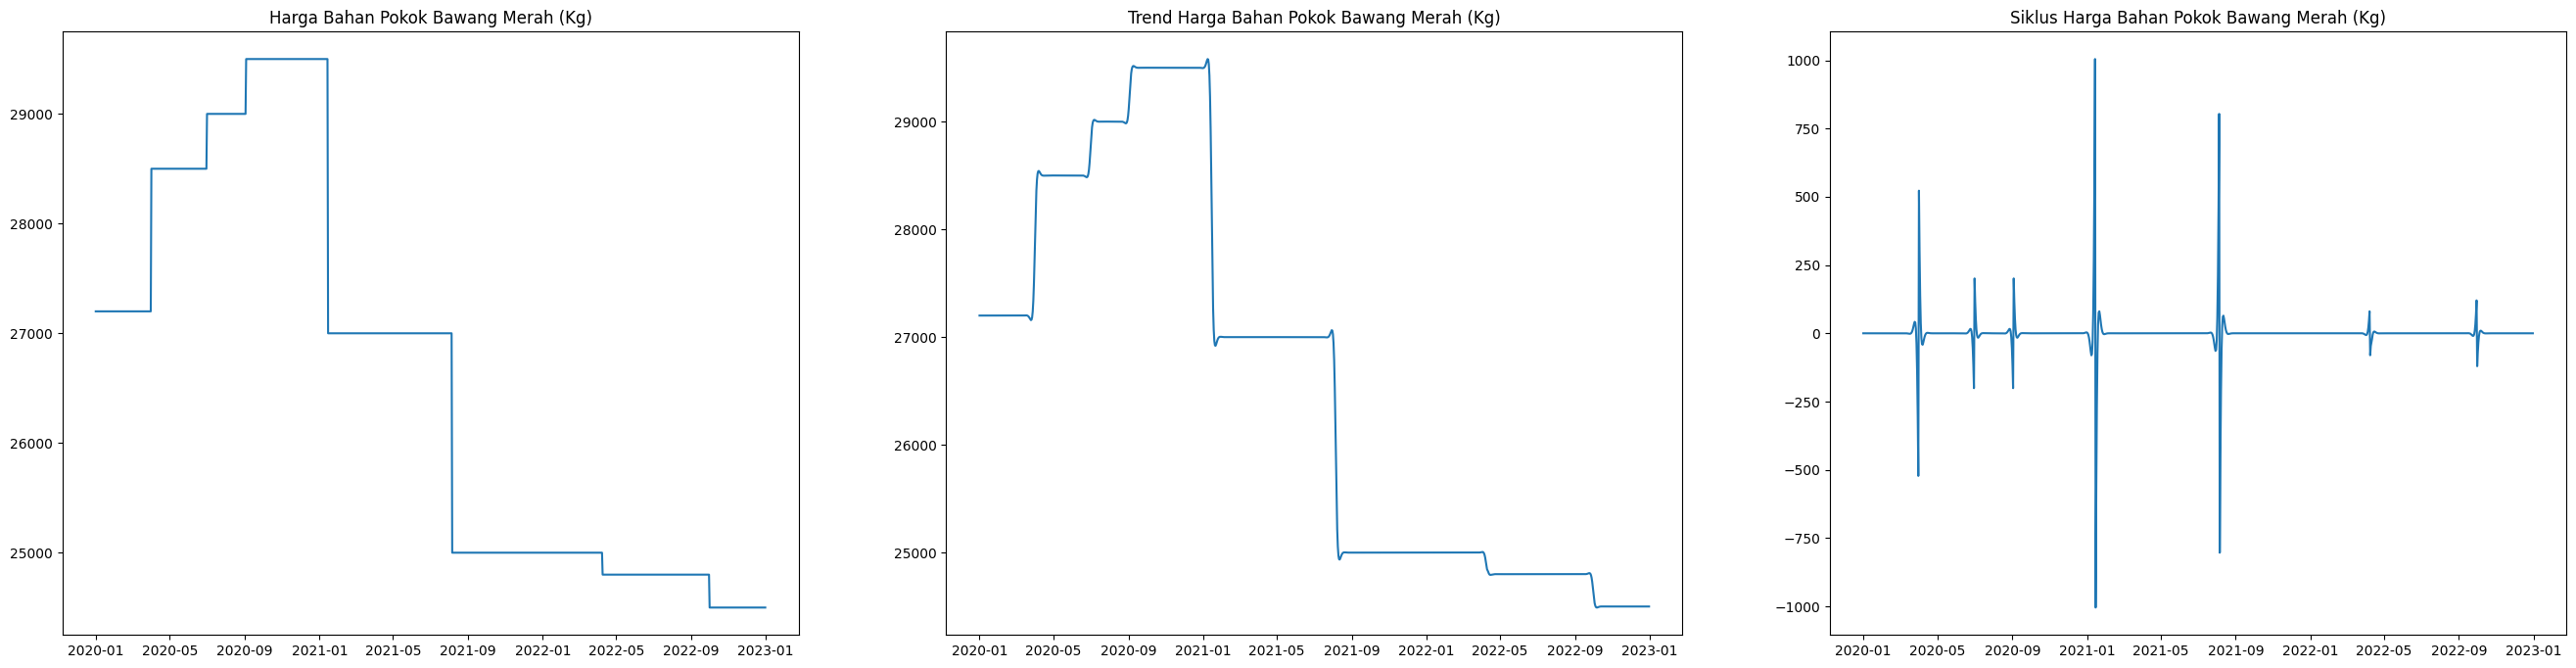

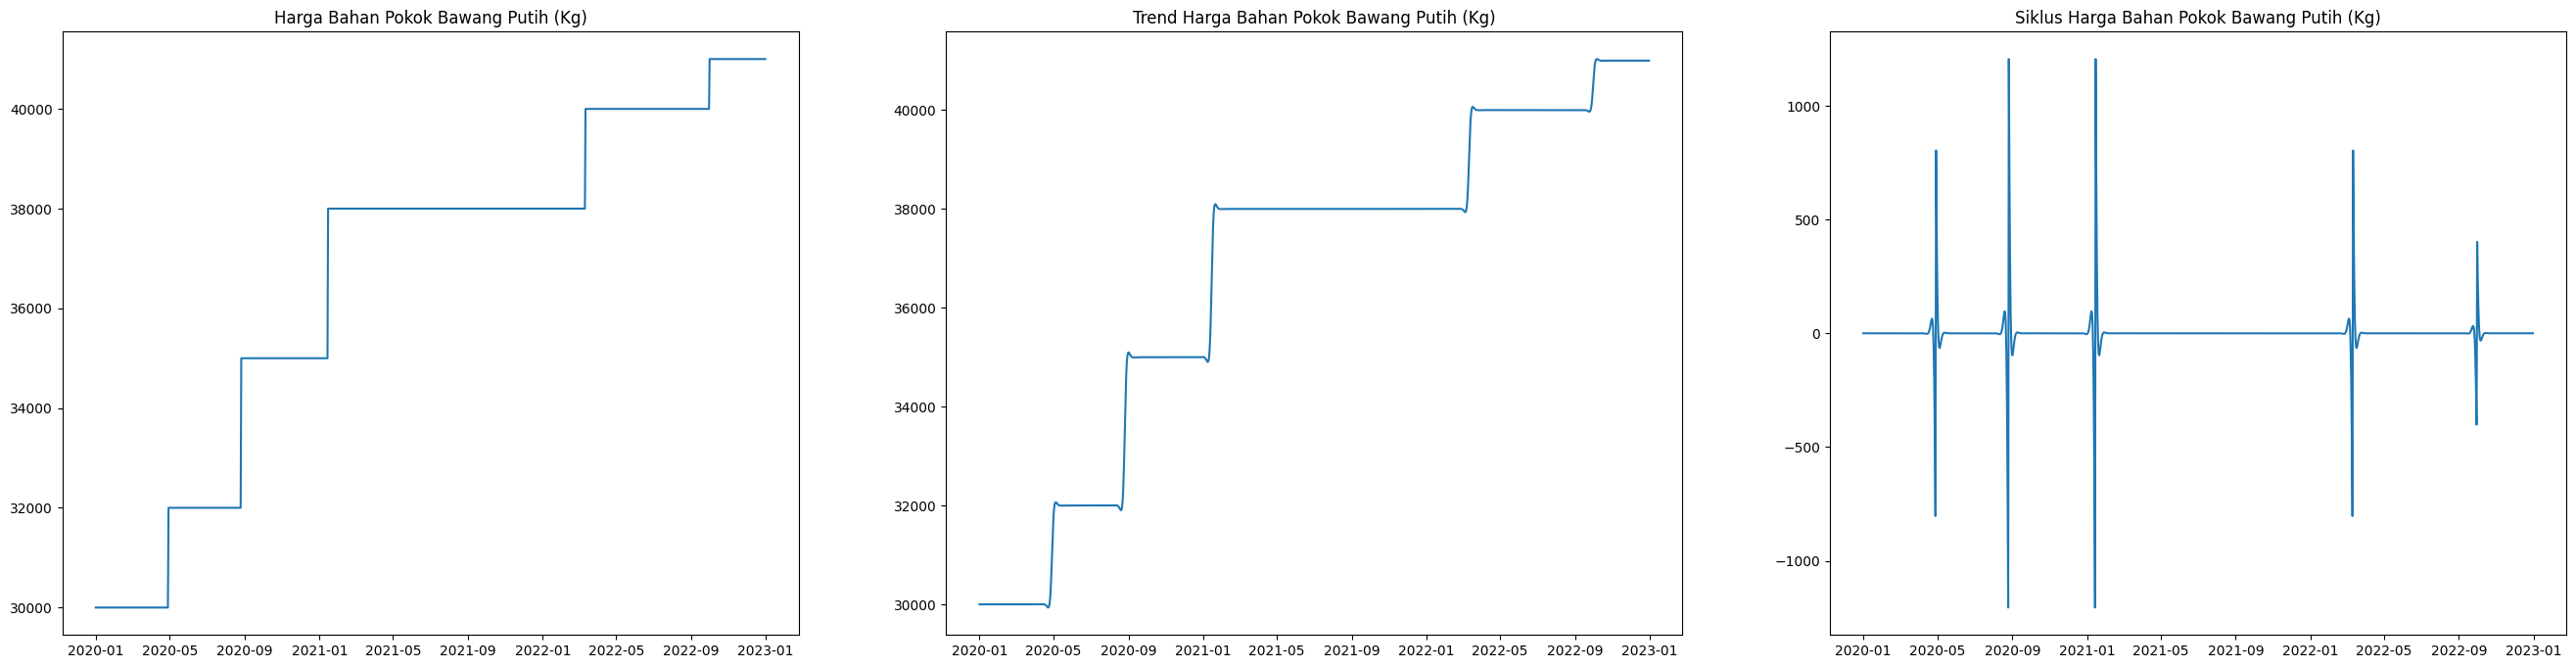

In [23]:
for i in df.columns:
  dataset = df[i]
  cycle, trend = sm.tsa.filters.hpfilter(dataset, 12)
  fig, ax = plt.subplots(1,3,figsize=(33,8))
  ax[0].plot(dataset)
  ax[0].set_title('Harga Bahan Pokok {}'.format(i))
  ax[1].plot(trend)
  ax[1].set_title('Trend Harga Bahan Pokok {}'.format(i))
  ax[2].plot(cycle)
  ax[2].set_title('Siklus Harga Bahan Pokok {}'.format(i))
  print('\n \n')
  plt.show()

**Data Preprocessing**

Train Test Split

 Train, test, split adalah salah satu metode yang dapat digunakan untuk mengevaluasi performa model machine learning.

In [24]:
train_data, test_data = df[0 : int(len(df) * 0.8)], df[int(len(df) * 0.8) :]

In [25]:
print('bentuk data train = ',train_data.shape)
print('bentuk data test = ',test_data.shape)

bentuk data train =  (874, 10)
bentuk data test =  (219, 10)


**Model LSTM**

In [26]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [27]:
#deskripsi bentuk data train,test
def ekstrak_window_data(dataset, window_len=5, zero_base=True):
    window_data = []
    for i in range(len(dataset) - window_len):
        tmp = dataset[i: (i + window_len)].copy()
        window_data.append(tmp.values)
    return np.array(window_data)

#membentuk data baru kriteria LSTM
def prepare_data(dataset, aim, window_len=10, zero_base=True, test_size=0.2):
    X_train = ekstrak_window_data(train_data, window_len, zero_base)
    X_test = ekstrak_window_data(test_data, window_len, zero_base)
    y_train = train_data[aim][window_len:].values
    y_test = test_data[aim][window_len:].values
    if zero_base:
        y_train = y_train / train_data[aim][:-window_len].values - 1
        y_test = y_test / test_data[aim][:-window_len].values - 1
    return train_data, test_data, X_train, X_test, y_train, y_test

#membangun model LSTM
def build_model(optimizer):
    grid_model = Sequential()
    grid_model.add(LSTM(50,return_sequences=True,input_shape=(10,16)))
    grid_model.add(LSTM(50))
    grid_model.add(Dropout(0.2))
    grid_model.add(Dense(1))
    grid_model.compile(loss = 'mse',optimizer = optimizer, metrics=['accuracy'])
    return grid_model

In [30]:
def model_lstm(input_data, output_size, neurons, activ_func='linear', dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    return model

**Data (df) tanpa scalling**

data yang digunakan tanpa standarisasi atau normalisa pada data frame

Epoch 1/100
54/54 [==============================] - 3s 15ms/step - loss: 0.1719 - accuracy: 0.7535 - val_loss: 6.5707e-06 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 0s 6ms/step - loss: 0.1355 - accuracy: 0.7384 - val_loss: 4.8178e-04 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 0s 6ms/step - loss: 0.1104 - accuracy: 0.7593 - val_loss: 6.1074e-04 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0890 - accuracy: 0.7789 - val_loss: 1.3440e-05 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 1s 10ms/step - loss: 0.0654 - accuracy: 0.7928 - val_loss: 9.7494e-06 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0552 - accuracy: 0.8032 - val_loss: 5.9225e-04 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0471 - accuracy: 0.8079 - val_loss: 8.5148e-06 - val

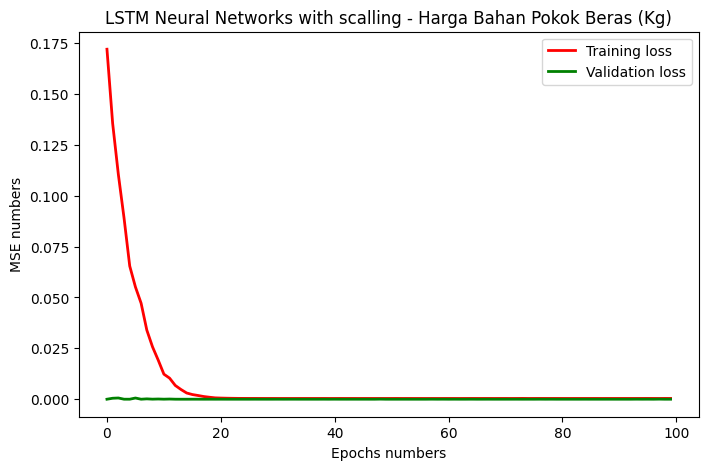

Epoch 1/100
54/54 [==============================] - 2s 11ms/step - loss: 1.5873 - accuracy: 0.9248 - val_loss: 0.5022 - val_accuracy: 1.0000
Epoch 2/100
54/54 [==============================] - 0s 5ms/step - loss: 0.3277 - accuracy: 0.9132 - val_loss: 0.1063 - val_accuracy: 1.0000
Epoch 3/100
54/54 [==============================] - 0s 4ms/step - loss: 0.1583 - accuracy: 0.9074 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 4/100
54/54 [==============================] - 0s 4ms/step - loss: 0.1084 - accuracy: 0.8738 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 5/100
54/54 [==============================] - 0s 4ms/step - loss: 0.1037 - accuracy: 0.8738 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 6/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0934 - accuracy: 0.8785 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 7/100
54/54 [==============================] - 0s 5ms/step - loss: 0.0849 - accuracy: 0.8900 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 8/100


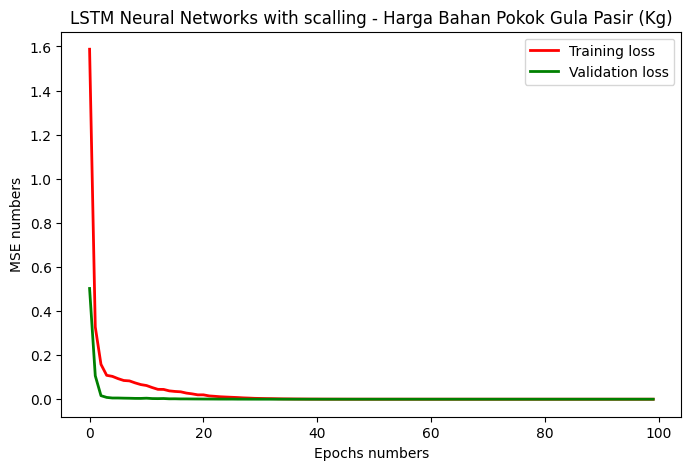

Epoch 1/100
54/54 [==============================] - 3s 11ms/step - loss: 0.3457 - accuracy: 0.7720 - val_loss: 0.0061 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 0s 5ms/step - loss: 0.1960 - accuracy: 0.8218 - val_loss: 0.0052 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 0s 5ms/step - loss: 0.1731 - accuracy: 0.8438 - val_loss: 0.0021 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 0s 5ms/step - loss: 0.1330 - accuracy: 0.8831 - val_loss: 0.0071 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 0s 6ms/step - loss: 0.1024 - accuracy: 0.8773 - val_loss: 0.0012 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0884 - accuracy: 0.8981 - val_loss: 0.0024 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0646 - accuracy: 0.9190 - val_loss: 0.0010 - val_accuracy: 0.9522
Epoch 8/100


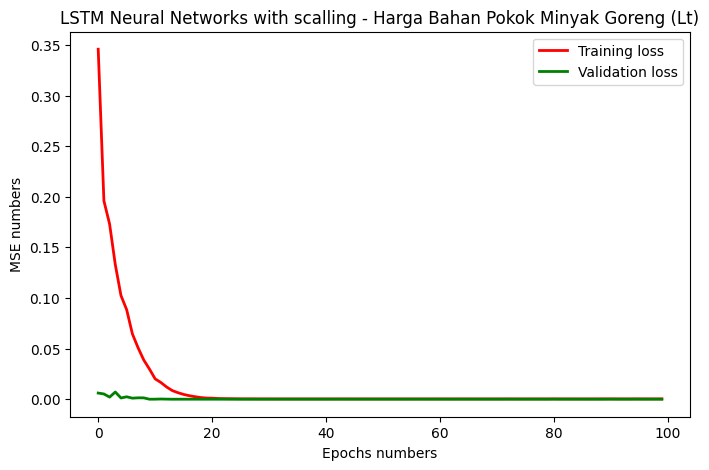

Epoch 1/100
54/54 [==============================] - 2s 11ms/step - loss: 0.4279 - accuracy: 0.9213 - val_loss: 0.1186 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 0s 4ms/step - loss: 0.1946 - accuracy: 0.8403 - val_loss: 0.1429 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 0s 4ms/step - loss: 0.1611 - accuracy: 0.8600 - val_loss: 0.0914 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 0s 4ms/step - loss: 0.1541 - accuracy: 0.8657 - val_loss: 0.0637 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 0s 4ms/step - loss: 0.1282 - accuracy: 0.9016 - val_loss: 0.0427 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0996 - accuracy: 0.9051 - val_loss: 0.0247 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0895 - accuracy: 0.9190 - val_loss: 0.0164 - val_accuracy: 0.9522
Epoch 8/100


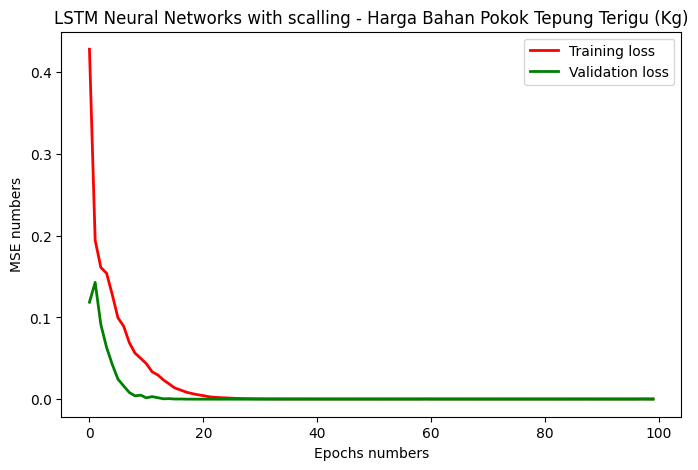

Epoch 1/100
54/54 [==============================] - 2s 16ms/step - loss: 0.1480 - accuracy: 0.9225 - val_loss: 1.1817e-04 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 0s 5ms/step - loss: 0.0925 - accuracy: 0.9005 - val_loss: 4.6830e-04 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0874 - accuracy: 0.9155 - val_loss: 1.8897e-04 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0686 - accuracy: 0.9225 - val_loss: 1.3739e-04 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 0s 5ms/step - loss: 0.0569 - accuracy: 0.9421 - val_loss: 1.1779e-04 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0428 - accuracy: 0.9456 - val_loss: 1.8105e-04 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0344 - accuracy: 0.9491 - val_loss: 2.1236e-04 - val_a

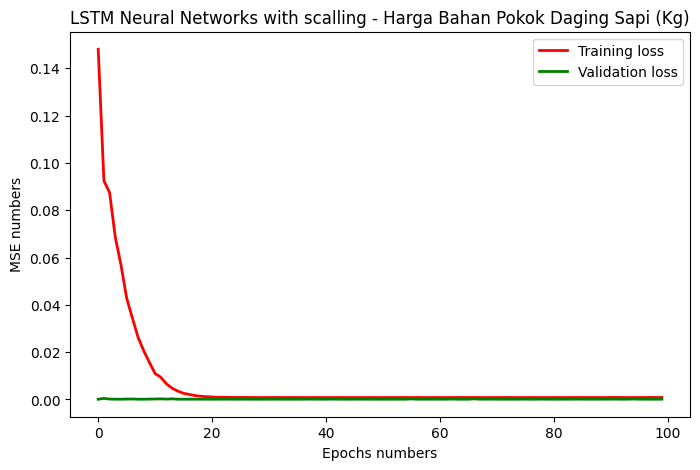

Epoch 1/100
54/54 [==============================] - 2s 11ms/step - loss: 0.2592 - accuracy: 0.8032 - val_loss: 0.0278 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 0s 4ms/step - loss: 0.2078 - accuracy: 0.8310 - val_loss: 0.0198 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 0s 5ms/step - loss: 0.1649 - accuracy: 0.8553 - val_loss: 0.0124 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 0s 4ms/step - loss: 0.1150 - accuracy: 0.8970 - val_loss: 0.0084 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 0s 5ms/step - loss: 0.0891 - accuracy: 0.9225 - val_loss: 0.0051 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 0s 5ms/step - loss: 0.0693 - accuracy: 0.9410 - val_loss: 0.0032 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0474 - accuracy: 0.9549 - val_loss: 0.0020 - val_accuracy: 0.9522
Epoch 8/100


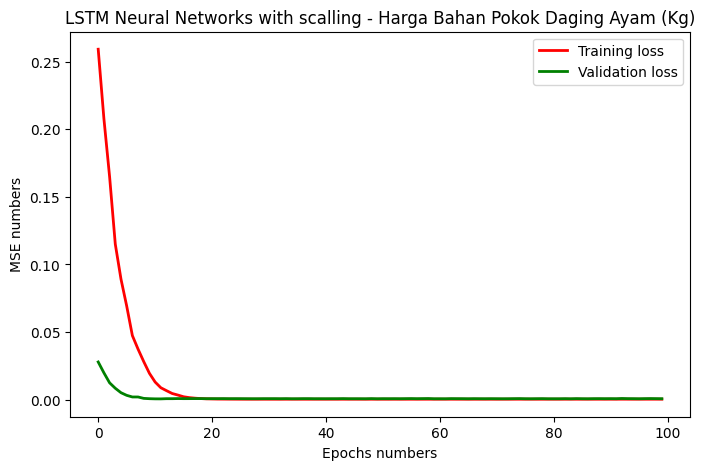

Epoch 1/100
54/54 [==============================] - 3s 12ms/step - loss: 0.1743 - accuracy: 0.9225 - val_loss: 0.0028 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 0s 6ms/step - loss: 0.1063 - accuracy: 0.9028 - val_loss: 0.0037 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0973 - accuracy: 0.9167 - val_loss: 0.0011 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0714 - accuracy: 0.9410 - val_loss: 0.0012 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 0s 7ms/step - loss: 0.0665 - accuracy: 0.9410 - val_loss: 0.0011 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0517 - accuracy: 0.9525 - val_loss: 2.5859e-04 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0409 - accuracy: 0.9595 - val_loss: 9.4024e-05 - val_accuracy: 0.9522
Epoc

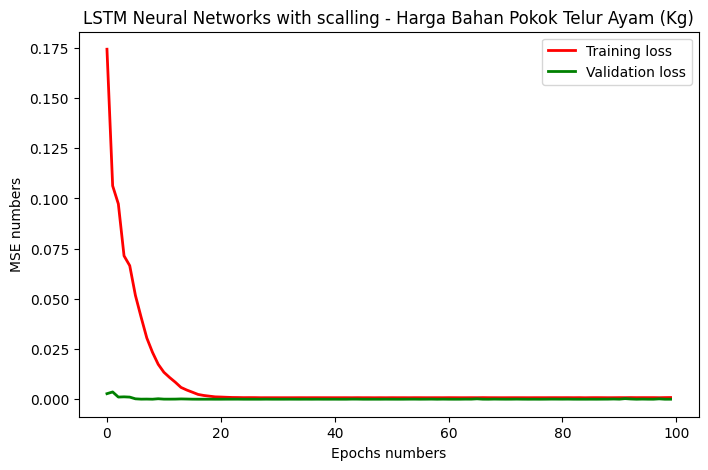

Epoch 1/100
54/54 [==============================] - 2s 11ms/step - loss: 0.2464 - accuracy: 0.6991 - val_loss: 0.0075 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 0s 4ms/step - loss: 0.1471 - accuracy: 0.8484 - val_loss: 0.0073 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 0s 5ms/step - loss: 0.1083 - accuracy: 0.9016 - val_loss: 0.0031 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0954 - accuracy: 0.8981 - val_loss: 0.0030 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 0s 5ms/step - loss: 0.0784 - accuracy: 0.9201 - val_loss: 0.0024 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 0s 5ms/step - loss: 0.0605 - accuracy: 0.9329 - val_loss: 8.5625e-04 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0490 - accuracy: 0.9398 - val_loss: 1.3303e-04 - val_accuracy: 0.9522
Epoc

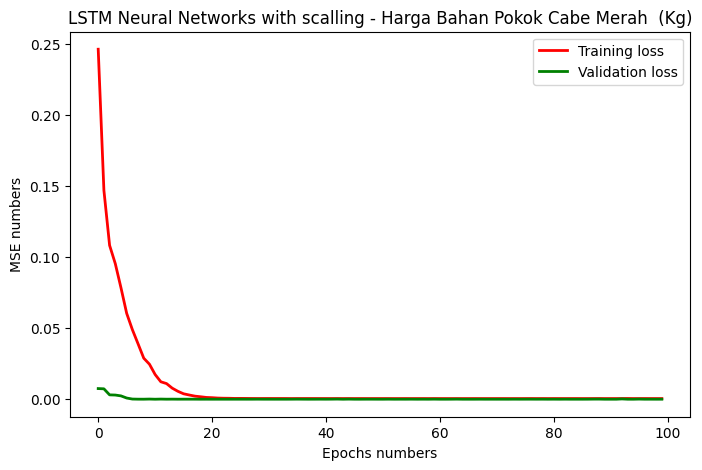

Epoch 1/100
54/54 [==============================] - 2s 11ms/step - loss: 0.1265 - accuracy: 0.8831 - val_loss: 0.0146 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0932 - accuracy: 0.8808 - val_loss: 0.0090 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 0s 5ms/step - loss: 0.0727 - accuracy: 0.9051 - val_loss: 0.0057 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0519 - accuracy: 0.9132 - val_loss: 0.0024 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 0s 4ms/step - loss: 0.0383 - accuracy: 0.9294 - val_loss: 0.0012 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 0s 5ms/step - loss: 0.0278 - accuracy: 0.9306 - val_loss: 4.9991e-04 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 0s 6ms/step - loss: 0.0194 - accuracy: 0.9306 - val_loss: 3.0444e-04 - val_accuracy: 0.9522
Epoc

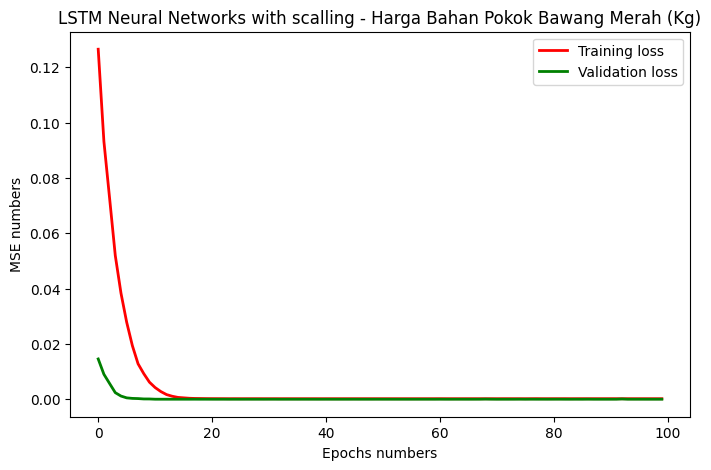

Epoch 1/100
54/54 [==============================] - 2s 16ms/step - loss: 0.8520 - accuracy: 0.9502 - val_loss: 0.1749 - val_accuracy: 0.9522
Epoch 2/100
54/54 [==============================] - 0s 5ms/step - loss: 0.2179 - accuracy: 0.8993 - val_loss: 0.0052 - val_accuracy: 0.9522
Epoch 3/100
54/54 [==============================] - 0s 5ms/step - loss: 0.1512 - accuracy: 0.8808 - val_loss: 3.1143e-04 - val_accuracy: 0.9522
Epoch 4/100
54/54 [==============================] - 0s 5ms/step - loss: 0.1469 - accuracy: 0.8576 - val_loss: 6.7851e-04 - val_accuracy: 0.9522
Epoch 5/100
54/54 [==============================] - 0s 4ms/step - loss: 0.1452 - accuracy: 0.8565 - val_loss: 5.0104e-04 - val_accuracy: 0.9522
Epoch 6/100
54/54 [==============================] - 0s 5ms/step - loss: 0.1347 - accuracy: 0.8819 - val_loss: 3.4485e-04 - val_accuracy: 0.9522
Epoch 7/100
54/54 [==============================] - 0s 5ms/step - loss: 0.1101 - accuracy: 0.8958 - val_loss: 1.7296e-04 - val_accuracy:

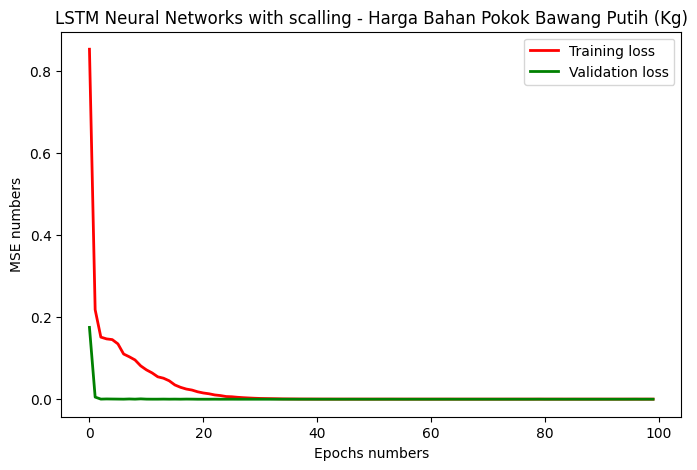

In [34]:
def normal_min_max(continuous):
    return (continuous - continuous.min()) / (df.max() - continuous.min())

df_minmax = normal_min_max(df)

#run model LSTM
MSE_scaled = []
MAPE_scaled = []
for i in aim:
  train_data, test_data, X_train, X_test, y_train, y_test = prepare_data(
                                                            df_minmax, aim = i, window_len=window_len, zero_base=zero_base, test_size=test_size)

  model = model_lstm(X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss, optimizer=optimizer)
  modelfit = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)
  #targets = test_data[i][window_len:]
  preds = model.predict(X_test).squeeze()
  MSE_scaled.append(mean_squared_error(preds, y_test))


  plt.figure(figsize=(8, 5))
  plt.plot(modelfit.history['loss'],'r',linewidth=2, label='Training loss')
  plt.plot(modelfit.history['val_loss'], 'g',linewidth=2, label='Validation loss')
  plt.title('LSTM Neural Networks with scalling - Harga Bahan Pokok {}'.format(i))
  plt.xlabel('Epochs numbers')
  plt.ylabel('MSE numbers')
  plt.legend()
  plt.show()

In [37]:
model = model.save("Sistem Prediksi Harga Bahan Pokok.h5")